## **Introduction to Artificial Intelligence - Computer Assignment 4 - Machine Learning**

## *Amin Aghakasiri*
## *Student ID : 810101381*

### *Summary and Purpose of the project*

In this data analysis project, we will explore and analyze a dataset to gain insights and make informed decisions. Data analysis is a crucial step in understanding patterns, trends, and relationships within the data, which can help us uncover valuable information and drive meaningful outcomes.

The goal of this project is to apply various data analysis techniques and methodologies to extract meaningful insights from the dataset. By examining the data, we aim to uncover patterns, identify correlations, and make data-driven decisions that can contribute to solving real-world problems or improving existing processes.

Throughout this project, we will utilize different tools and techniques, such as data visualization, statistical analysis, and machine learning algorithms, to explore and interpret the data. By leveraging these techniques, we can uncover hidden patterns, detect anomalies, and make predictions based on the available data.

The project will involve several stages, including data preprocessing, exploratory data analysis, feature engineering, and model development. Each stage will contribute to our understanding of the data and enable us to derive meaningful insights and actionable recommendations.

The purpose of this analysis is to build a ML regression model which can, given a specific set of input data, predict the average house price for an area in Boston. We will look to analyse the data to find the most relevant features for house prices, and then test various ML models on the data to see which gives the best apparent fit for the data.


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support, make_scorer, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [77]:
# Hyperparameters
K = 6
MAX_DEPTH = 2

## *Part1 : Exploratory Analysis of Data*

EDA is a vital step in the data analysis process that entails visually and statistically analyzing datasets to find patterns, trends, and insights.

The principal goals of exploratory data analysis (EDA) are to detect anomalies in the dataset and develop recommendations for additional investigation, thereby guaranteeing a thorough comprehension of the subtleties of the data.

In [78]:
df = pd.read_excel('DataSet.xlsx')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,NaN,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Question 1 : Data Summary

With the `info()` and `describe()` attributes, we can obtain a good view of the structure of our dataset.

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [80]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,480.000000,506.000000,506.000000,506.000000,479.000000,506.000000,506.000000,506.000000,486.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.175000,1.101175,15.679800,58.744660,6.211663,78.063241,339.317787,42.614980,336.820947,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.380364,1.646991,27.220206,33.104049,6.527286,203.542157,180.670077,87.585243,121.174519,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.425900,4.000000,254.000000,17.000000,370.415000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.917500,5.000000,307.000000,18.900000,390.885000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.341400,24.000000,403.000000,20.200000,395.630000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


#### Question 2 : Missing Values

For handeling missing values in our dataset in the preprocessing part, first we should obtain the proportion of these values for each attribute in the EDA part.

In [81]:
missing_values_count = df.isnull().sum()
total_rows = df.shape[0]
missing_proportion = (missing_values_count / total_rows) * 100
missing_data_info = pd.DataFrame({'Number of Missing Values': missing_values_count, 'Proportion (%)': missing_proportion})
print(missing_data_info)

         Number of Missing Values  Proportion (%)
CRIM                            0        0.000000
ZN                              0        0.000000
INDUS                           0        0.000000
CHAS                           26        5.138340
NOX                             0        0.000000
RM                              0        0.000000
AGE                             0        0.000000
DIS                            27        5.335968
RAD                             0        0.000000
TAX                             0        0.000000
PTRATIO                         0        0.000000
B                              20        3.952569
LSTAT                           0        0.000000
MEDV                           54       10.671937


In [82]:
df.nunique()

CRIM       452
ZN          27
INDUS       77
CHAS         2
NOX        132
RM         437
AGE        399
DIS        343
RAD         10
TAX         67
PTRATIO     85
B          357
LSTAT      445
MEDV       210
dtype: int64

#### Question 3 : Unique Values

Plotting the number of unique values for each feature can provide insights into the diversity and variability of the data within each column : 

* <b> Features with Few Unique Values  </b> : Features with fewer unique values (like "CHAS" and "RAD" features in below chart) are categorical or binary variables. These features are potential candidates for encoding or one-hot encoding before feeding them into machine learning models.

* <b> Features with Many Unique Values  </b> : Features with a large number of unique values (like "CRIM" and "LSTAT" features in below chart) are continuous or highly granular variables. These features contain a lot of information and may need special treatment during preprocessing or feature engineering step.

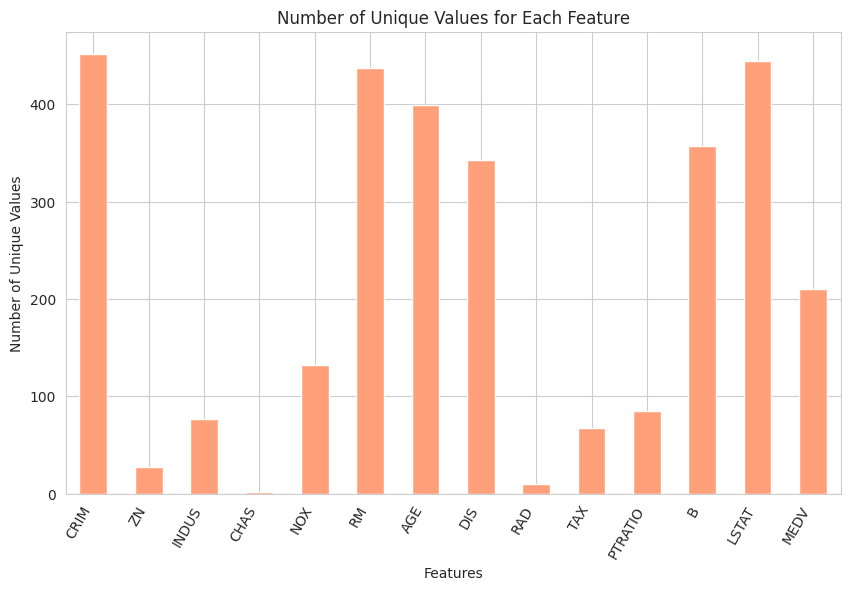

In [83]:
unique_values_count = df.nunique()

plt.figure(figsize=(10, 6))
unique_values_count.plot(kind='bar', color='lightsalmon')
plt.title('Number of Unique Values for Each Feature')
plt.xlabel('Features')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=60, ha='right')
plt.show()

#### Question 4 : Correlation Analysis

A correlation plot, often represented as a heatmap, shows the correlation coefficients between pairs of variables in a dataset. It's a useful visualization for understanding the relationships between variables and identifying potential patterns or dependencies.

The numbers in each cell represent the correlation coefficient between the corresponding pair of variables and the correlation coefficients range from -1 to 1 :

* Values close to 1 indicate a strong positive correlation (as one variable increases, the other also tends to increase).

* Values close to 0 indicate little to no linear correlation between the variables.

* Values close to -1 indicate a strong negative correlation (as one variable increases, the other tends to decrease).


By looking at the last row or column of the heatmap, we can see the correlations between the features and the target variable (MEDV). Positive correlations indicate features that are positively associated with the target variable, meaning an increase in these features tends to lead to an increase in the target variable. Negative correlations indicate features that are negatively associated with the target variable, meaning an increase in these features tends to lead to a decrease in the target variable. Darker colors signify strong correlation, while light colors represents weaker correlations.

By examining the correlation plot, we can identify which features are highly correlated with each other (for example for target varibale, "RM" is highly correlated with it and "LSTAT" is highly uncorrelated with it). This information can guide feature selection, preprocessing, and modeling decisions in our machine learning pipeline.


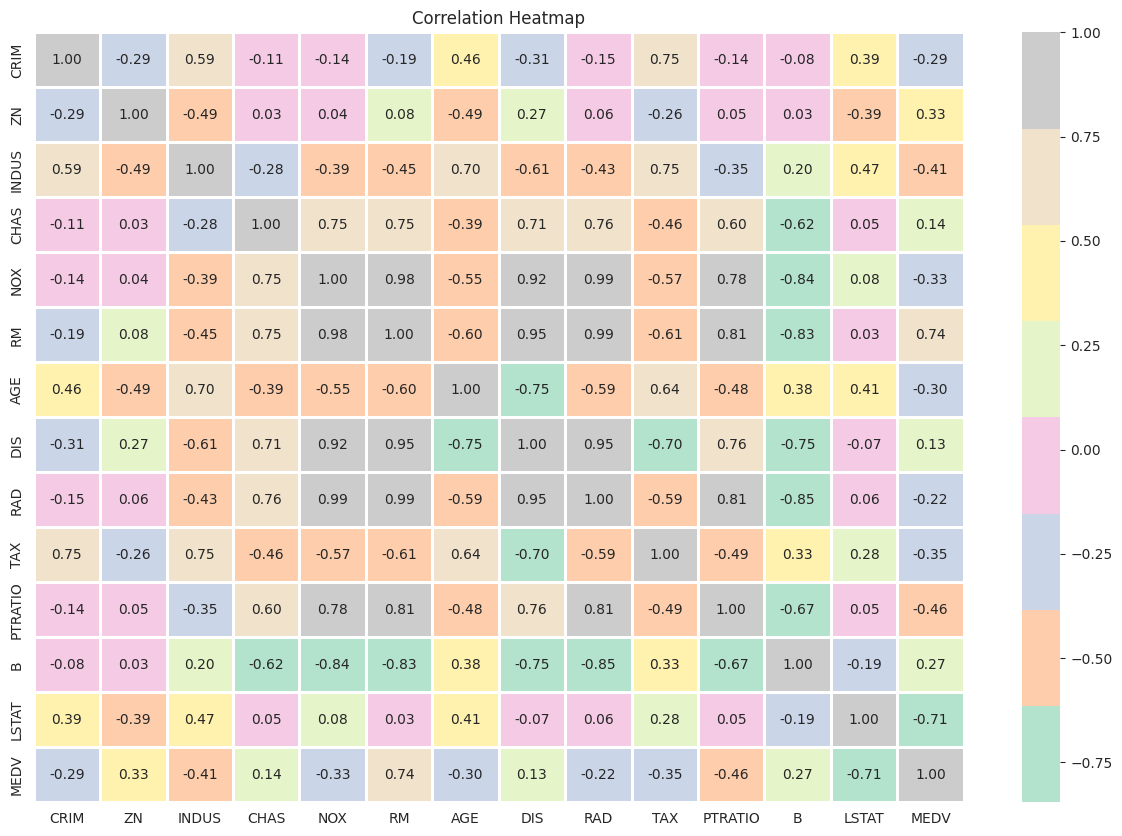

In [84]:
plt.figure(figsize=(15, 10))

sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
 
plt.title('Correlation Heatmap')
plt.show()

#### Question 5 : Hexbin and Scatter Plots

1. <b> Scatter Plots </b>

A scatter plot is a type of plot that displays the relationship between two continuous variables. Each point in the plot represents the value of one variable on the x-axis and the value of the other variable on the y-axis. Scatter plots are useful for visually identifying patterns, trends, and relationships between variables. Here's what we can interpret from the scatter plots :

* <b> Relationship </b> : The scatter plot shows the relationship between the two features.

* <b> Outliers </b> : Outlying points, if present, may indicate unusual or extreme values in the data that deviate from the overall pattern. For example in "INDUS" we can see 2 outliers at top right.

* <b> Trend </b> : If there's a trend in the plot (e.g., the points form a line or curve), it indicates a relationship between the two variables. For example, for "RM", we can see that the target feature is also increasing with increasing it as we saw that the correlation between them was high too (0.74) in the previous part.

* <b> Correlation </b> : We can visually assess the strength and direction of the correlation between the variables. If the points tend to cluster around a straight line (either positively or negatively sloped), it suggests a strong correlation (like for "RM").

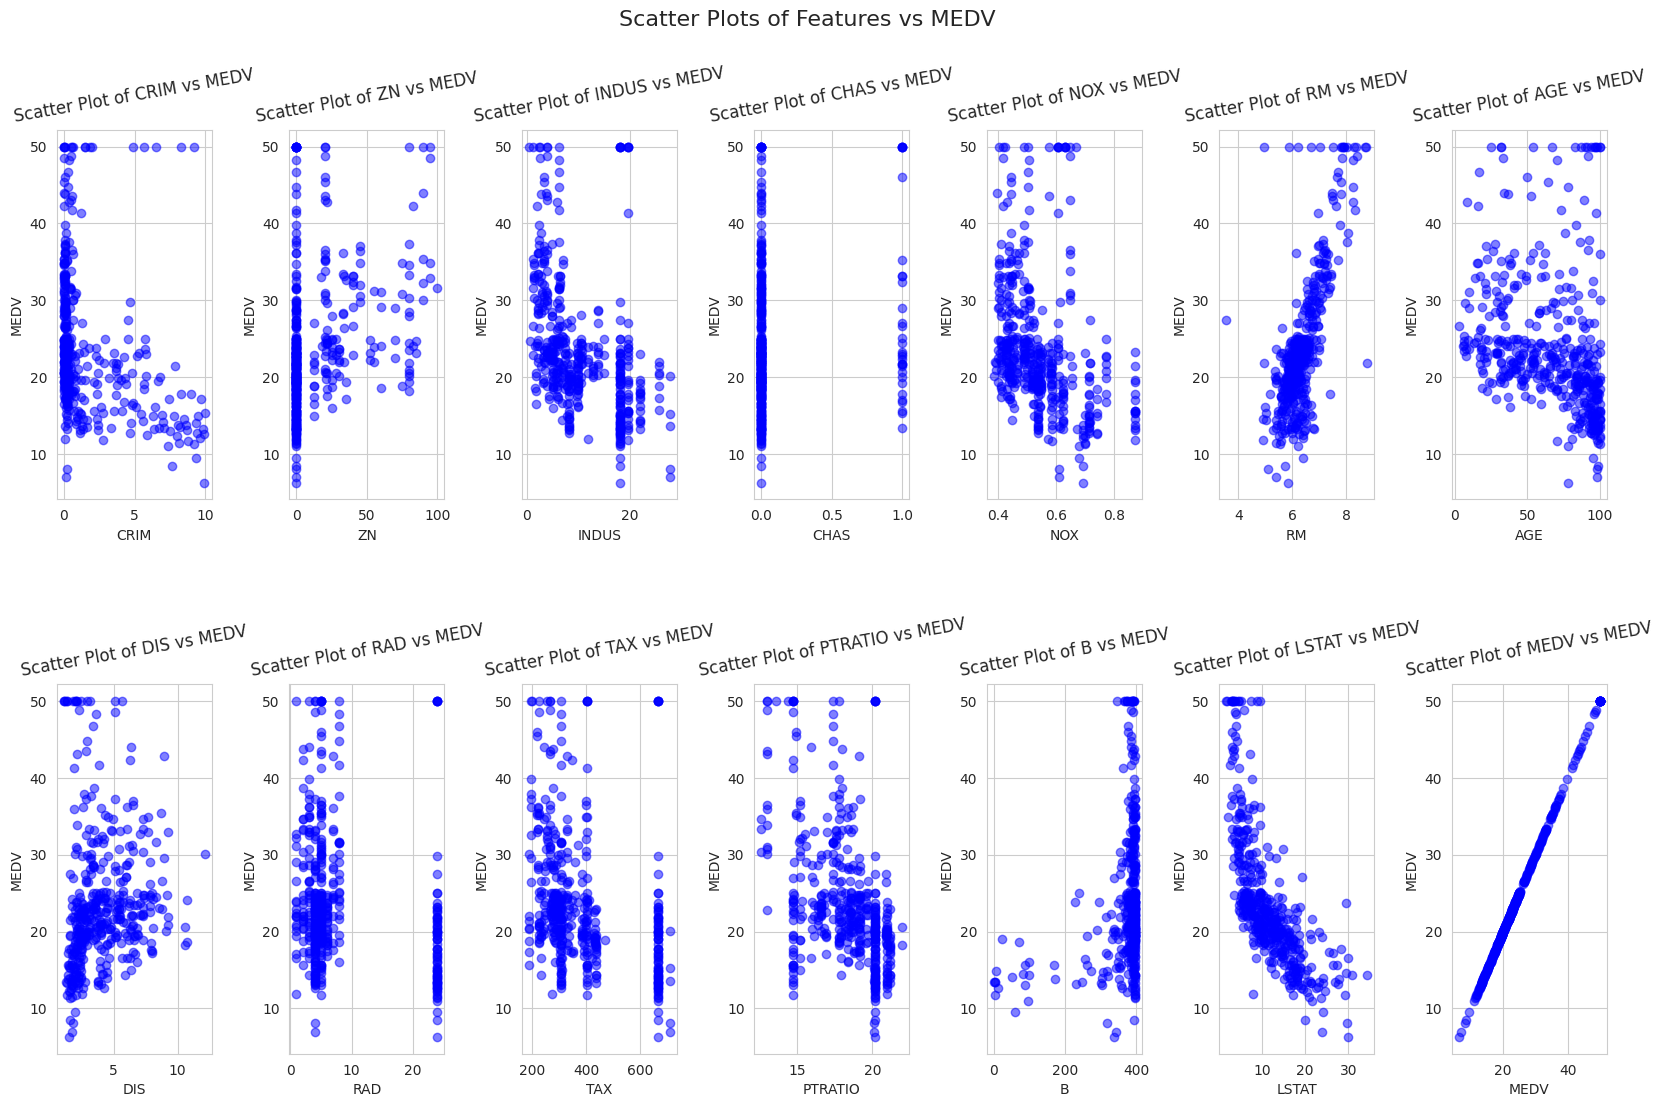

In [85]:
features = df.columns

plots_per_row = 7

total_rows = len(features) // plots_per_row + (len(features) % plots_per_row > 0)

fig, axs = plt.subplots(total_rows, plots_per_row, figsize=(20, 6 * total_rows))
fig.suptitle('Scatter Plots of Features vs MEDV', fontsize=16)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, feature in enumerate(features):
    row_index = i // plots_per_row
    col_index = i % plots_per_row
    ax = axs[row_index, col_index]
    ax.scatter(df[feature], df['MEDV'], alpha=0.5, c='blue', marker='o')
    ax.set_title(f'Scatter Plot of {feature} vs MEDV', rotation=10)
    ax.set_xlabel(feature)
    ax.set_ylabel('MEDV')

plt.show()

2. <b> Hexbin Plots </b>

Hexbin plot is a type of 2-dimensional scatter plot that is used to visualize the distribution of data points. Unlike a traditional scatter plot, where each data point is represented as a single dot, a hexbin plot aggregates the data points into a set of hexagonal bins. Each hexagonal bin is color-coded to represent the density of data points within that bin. The color scale is usually represented by a color map that ranges from light to dark, where lighter colors indicate lower densities and darker colors indicate higher densities.

In addition to showing the relationship between two variables, hexbin plots can also be used to visualize the distribution of the data, identify outliers, and detect regions of high and low density. These plots are also useful for exploring the relationship between two variables in a non-parametric way, as they do not make assumptions about the underlying distribution of the data.

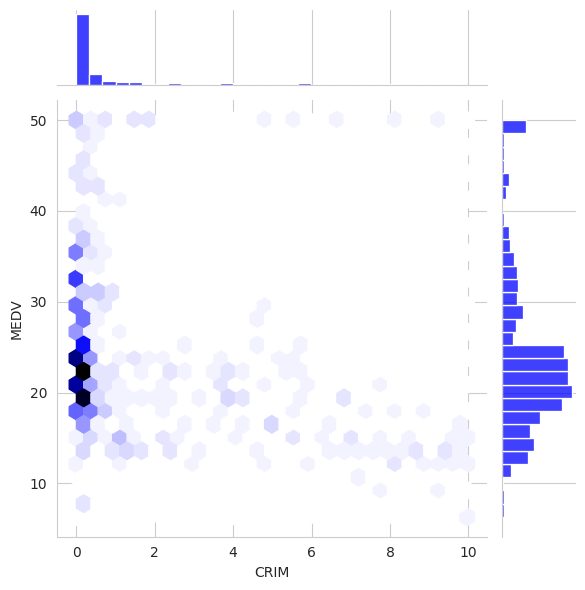

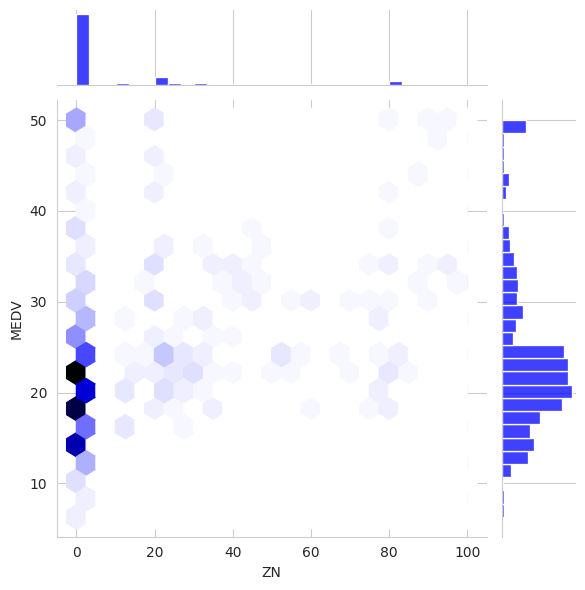

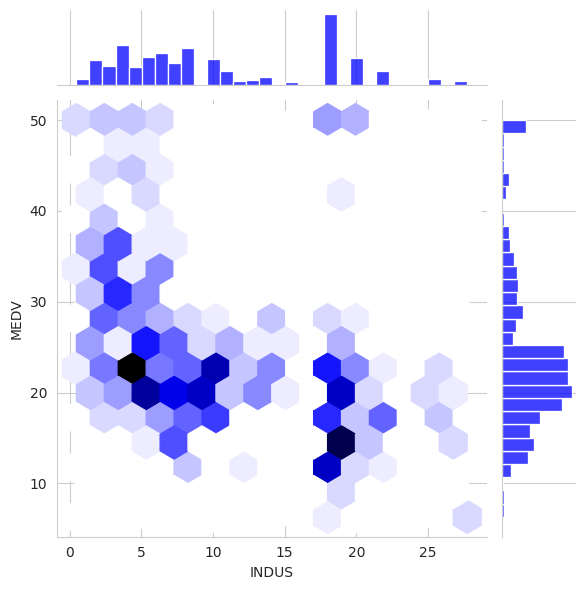

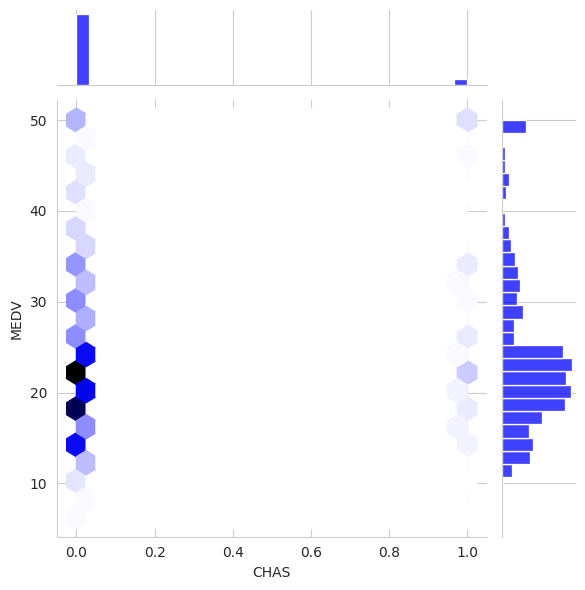

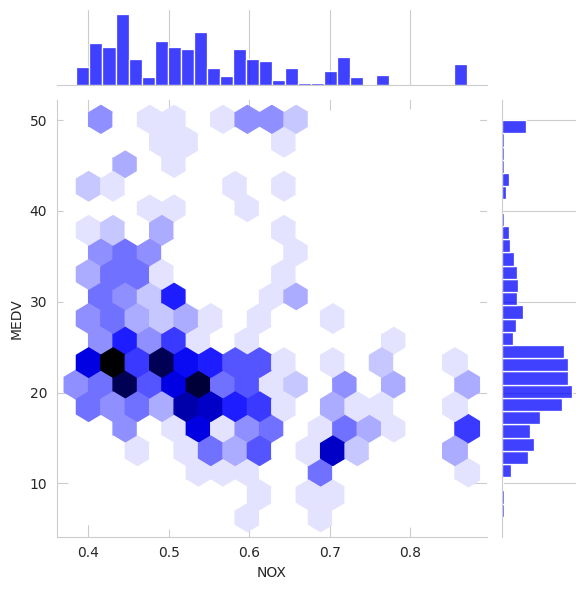

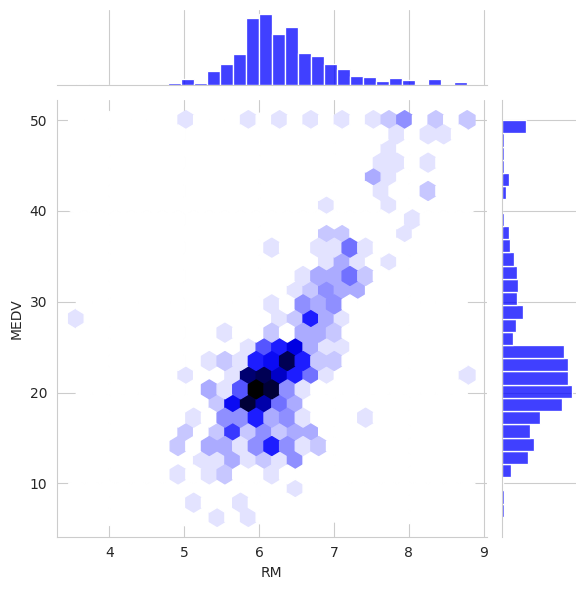

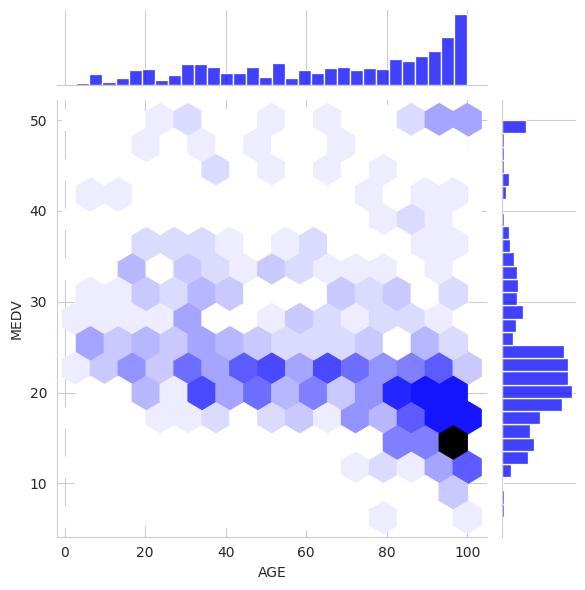

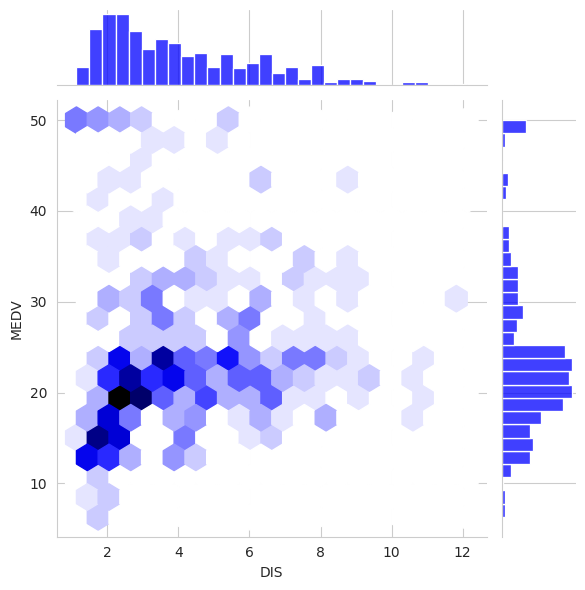

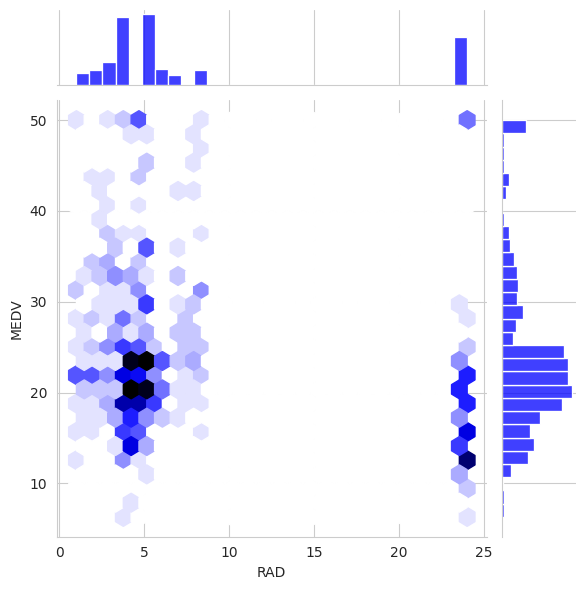

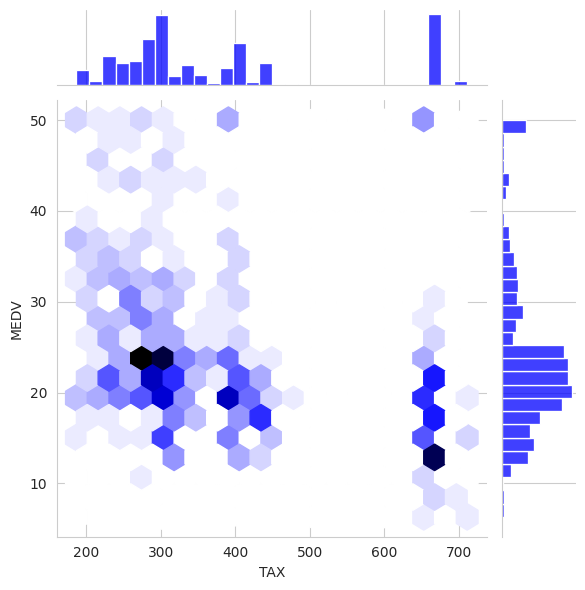

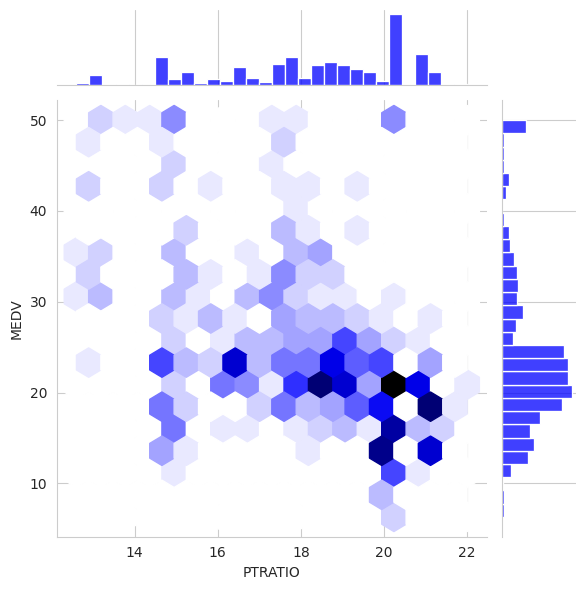

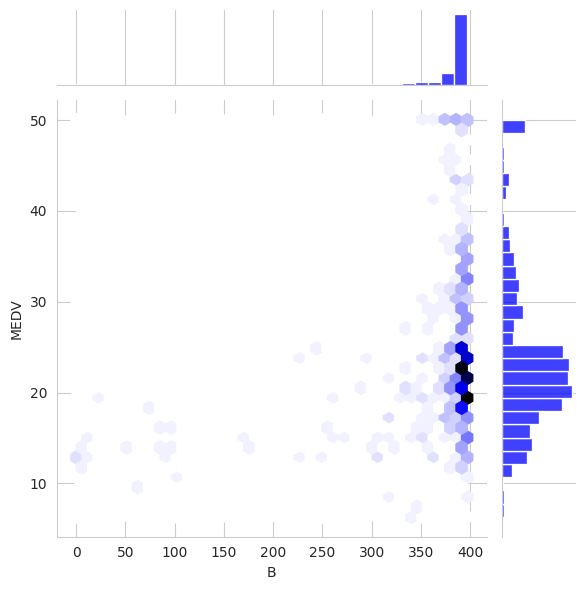

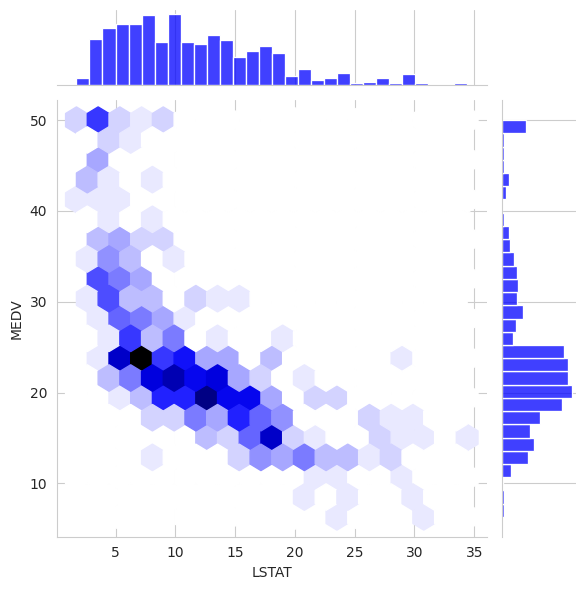

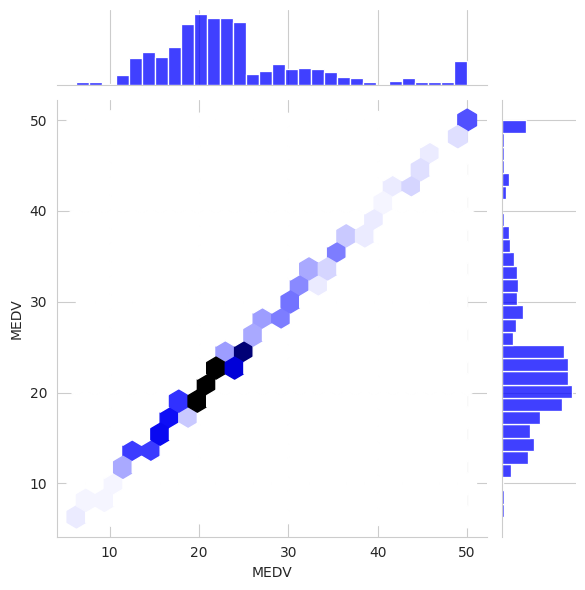

In [86]:
features = df.columns
for feature in features:
    sns.jointplot(x=df[feature], y=df['MEDV'], kind='hex', color='blue', marginal_kws=dict(bins=30, fill=True))
    plt.show()

#### Question 6 : Extracting Some Other Information From The Dataset

There are 3 main parts in EDA : 

1. <b> Univariate Analysis </b>

In Univariate analysis, plotting the right charts can help us better understand the data for each feature individually. There are different type of plots in this part:

* **Kernel Density Plots** : The kernel density plot is about the skewness of the of the corresponding feature. 
If the distribution has a long tail to the right and most of the data is concentrated on the left side, it is said to be positively skewed. In a positively skewed distribution, the mean is typically greater than the median, and the tail of the distribution extends towards the right. 

    If the distribution has a long tail to the left and most of the data is concentrated on the right side, it is said to be negatively skewed. In a negatively skewed distribution, the mean is typically less than the median, and the tail of the distribution extends towards the left. 

    If the distribution is symmetric, with equal amounts of data on both sides of the mean, it has zero skewness.In a symmetric distribution, the mean and median are equal, and the data is evenly distributed around the mean

* **Swarm Plots** : Swarm plots are a type of categorical scatter plot used to visualize the distribution of data points for different categories or groups. They are particularly useful when you have a relatively small dataset with categorical variables and want to understand the distribution of numerical values within each category.

2. <b> Bivariate Analysis </b>

When doing a bivariate analysis, two variables are examined simultaneously in order to look for patterns, dependencies, or interactions between them. Understanding how changes in one variable may correspond to changes in another requires the use of this statistical method.

Bivariate analysis allows for a thorough comprehension of the interdependence between two variables within a dataset by revealing information on the type and intensity of associations.

* **Violin Plots** : Violin plots are a type of categorical plot used to visualize the distribution of data across different categories or groups. They are similar to box plots but provide additional information about the probability density of the data at different values. Like a box plot, a violin plot typically includes a box that represents the interquartile range (IQR) of the data, with a line inside the box indicating the median value.  In addition to the box plot elements, a violin plot also includes a rotated kernel density plot on each side of the box. This KDE plot represents the distribution of the data at different values along the numerical axis. The width of the violin at any given point represents the density of data points at that value. Wider sections indicate a higher density of data points, while narrower sections indicate a lower density.

* **Box Plots** : Box plots, also known as box-and-whisker plots, are a statistical visualization technique used to summarize the distribution of a dataset and identify potential outliers. They provide a graphical representation of the central tendency, spread, and variability of numerical data. The box in the plot represents the interquartile range (IQR) of the data. The bottom and top edges of the box represent the first quartile (Q1) and third quartile (Q3) of the data, respectively. The length of the box indicates the spread or variability of the middle 50% of the data. Individual data points beyond the whiskers are considered outliers and are plotted as individual points or small circles. These points represent values that are significantly different from the rest of the dataset.

3. <b> Multivariate Analysis </b>

Interactions between three or more variables in a dataset are simultaneously analyzed and interpreted in multivariate analysis.

In order to provide a comprehensive understanding of the collective behavior of several variables, it seeks to reveal intricate patterns, relationships, and interactions between them.

Multivariate analysis examines correlations and dependencies between numerous variables by using sophisticated statistical techniques such factor analysis, principal component analysis, and multivariate regression.

The correlation heatmap is a type of multivariate analysis.

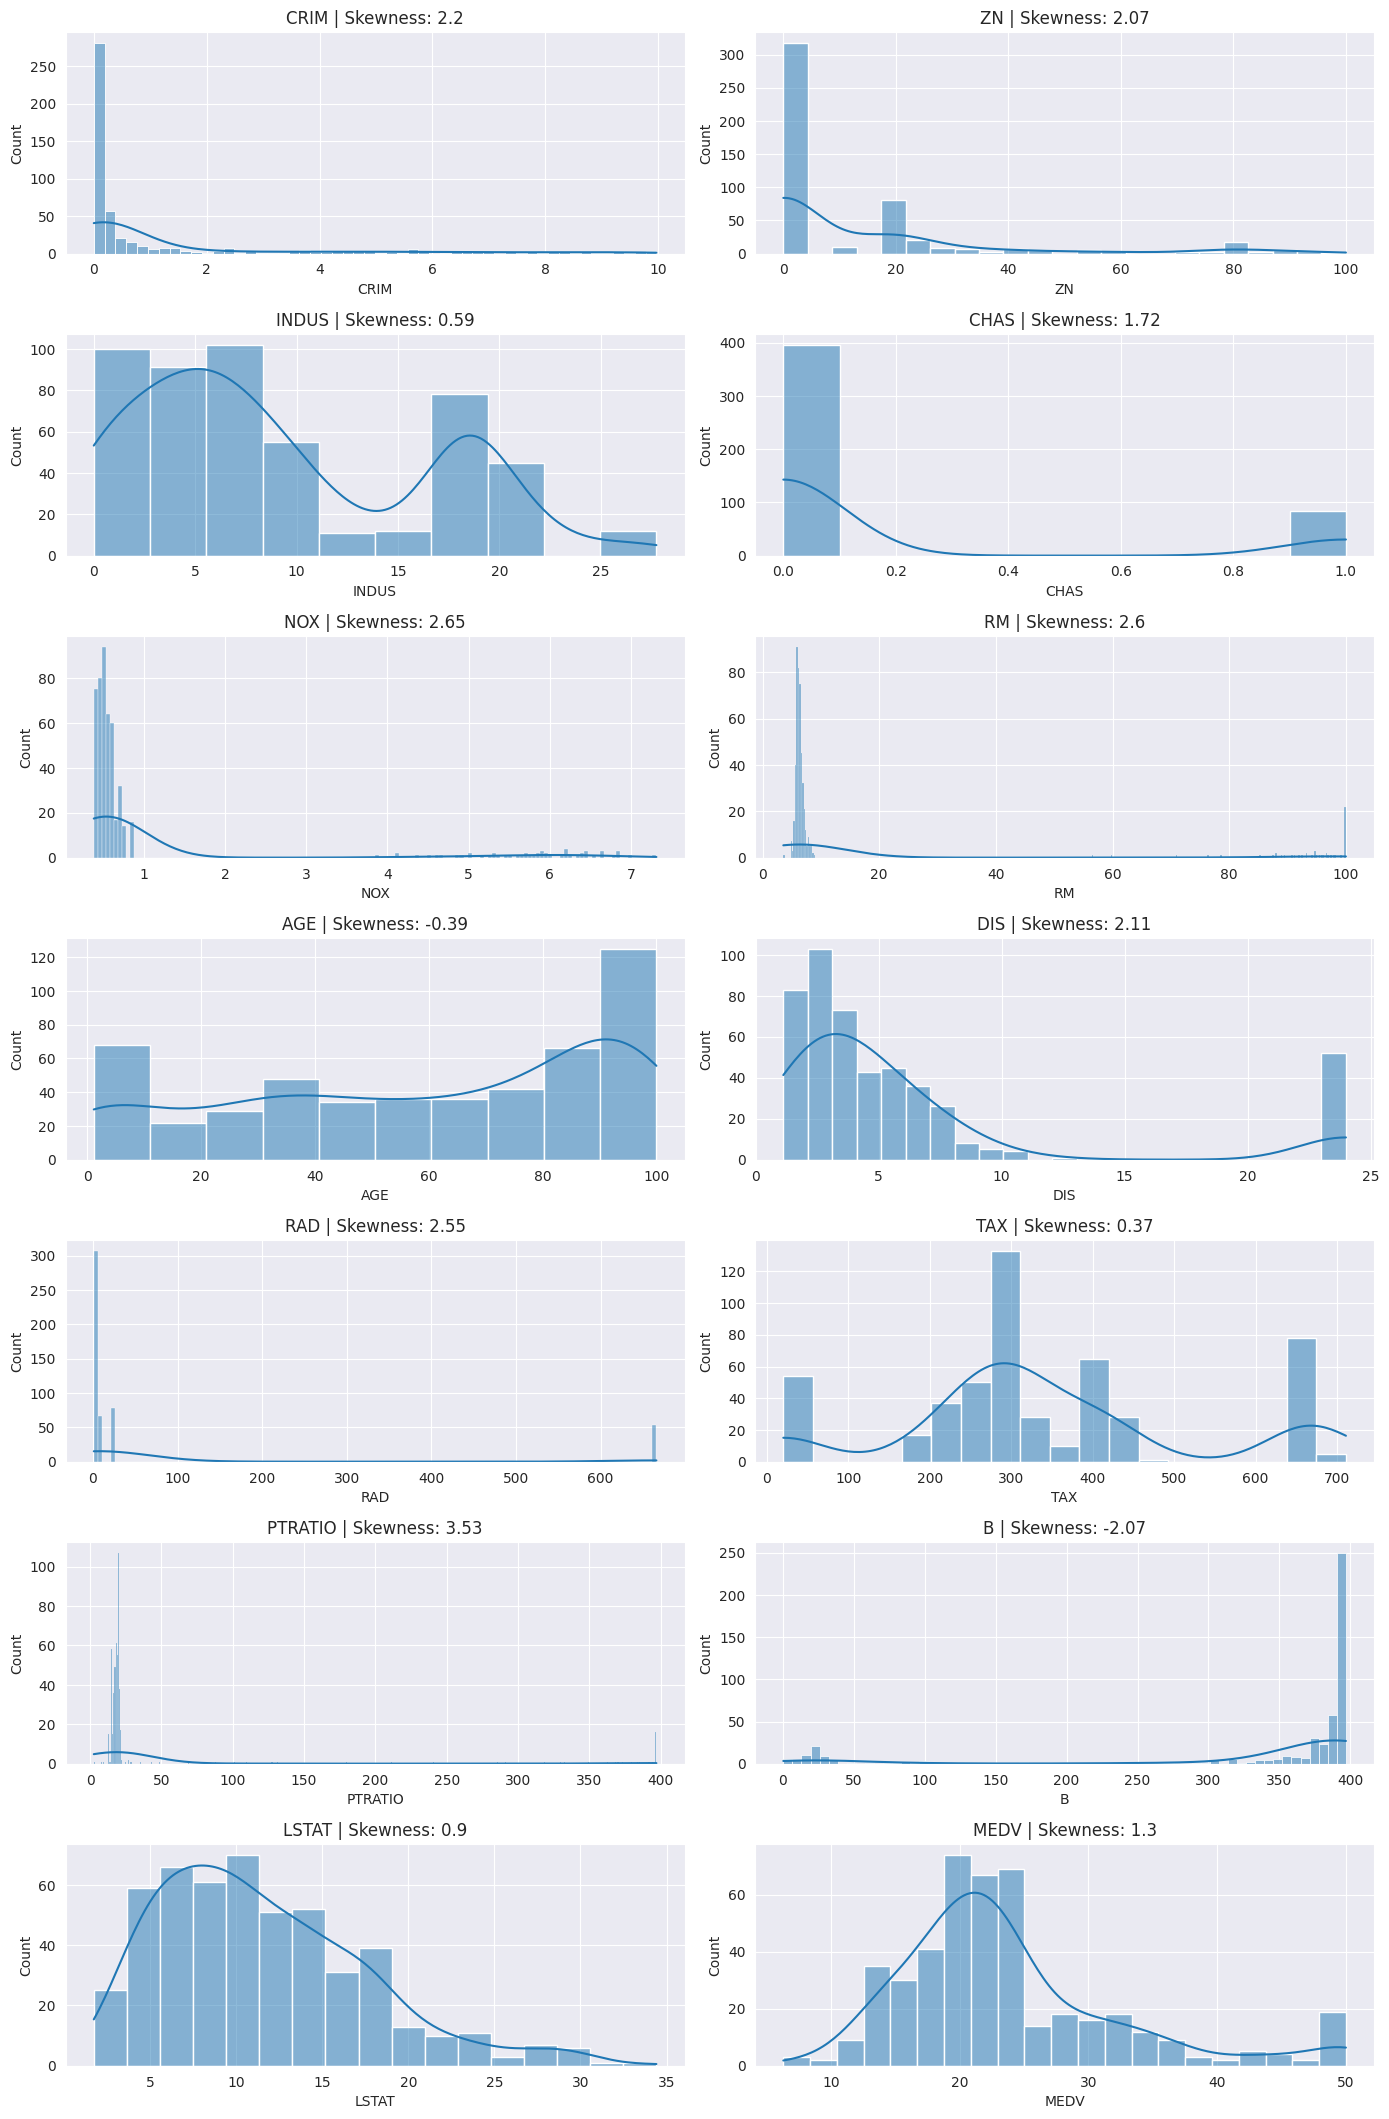

In [87]:
# Kernel Density Plots for The features
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
 
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
plt.tight_layout()
plt.show()

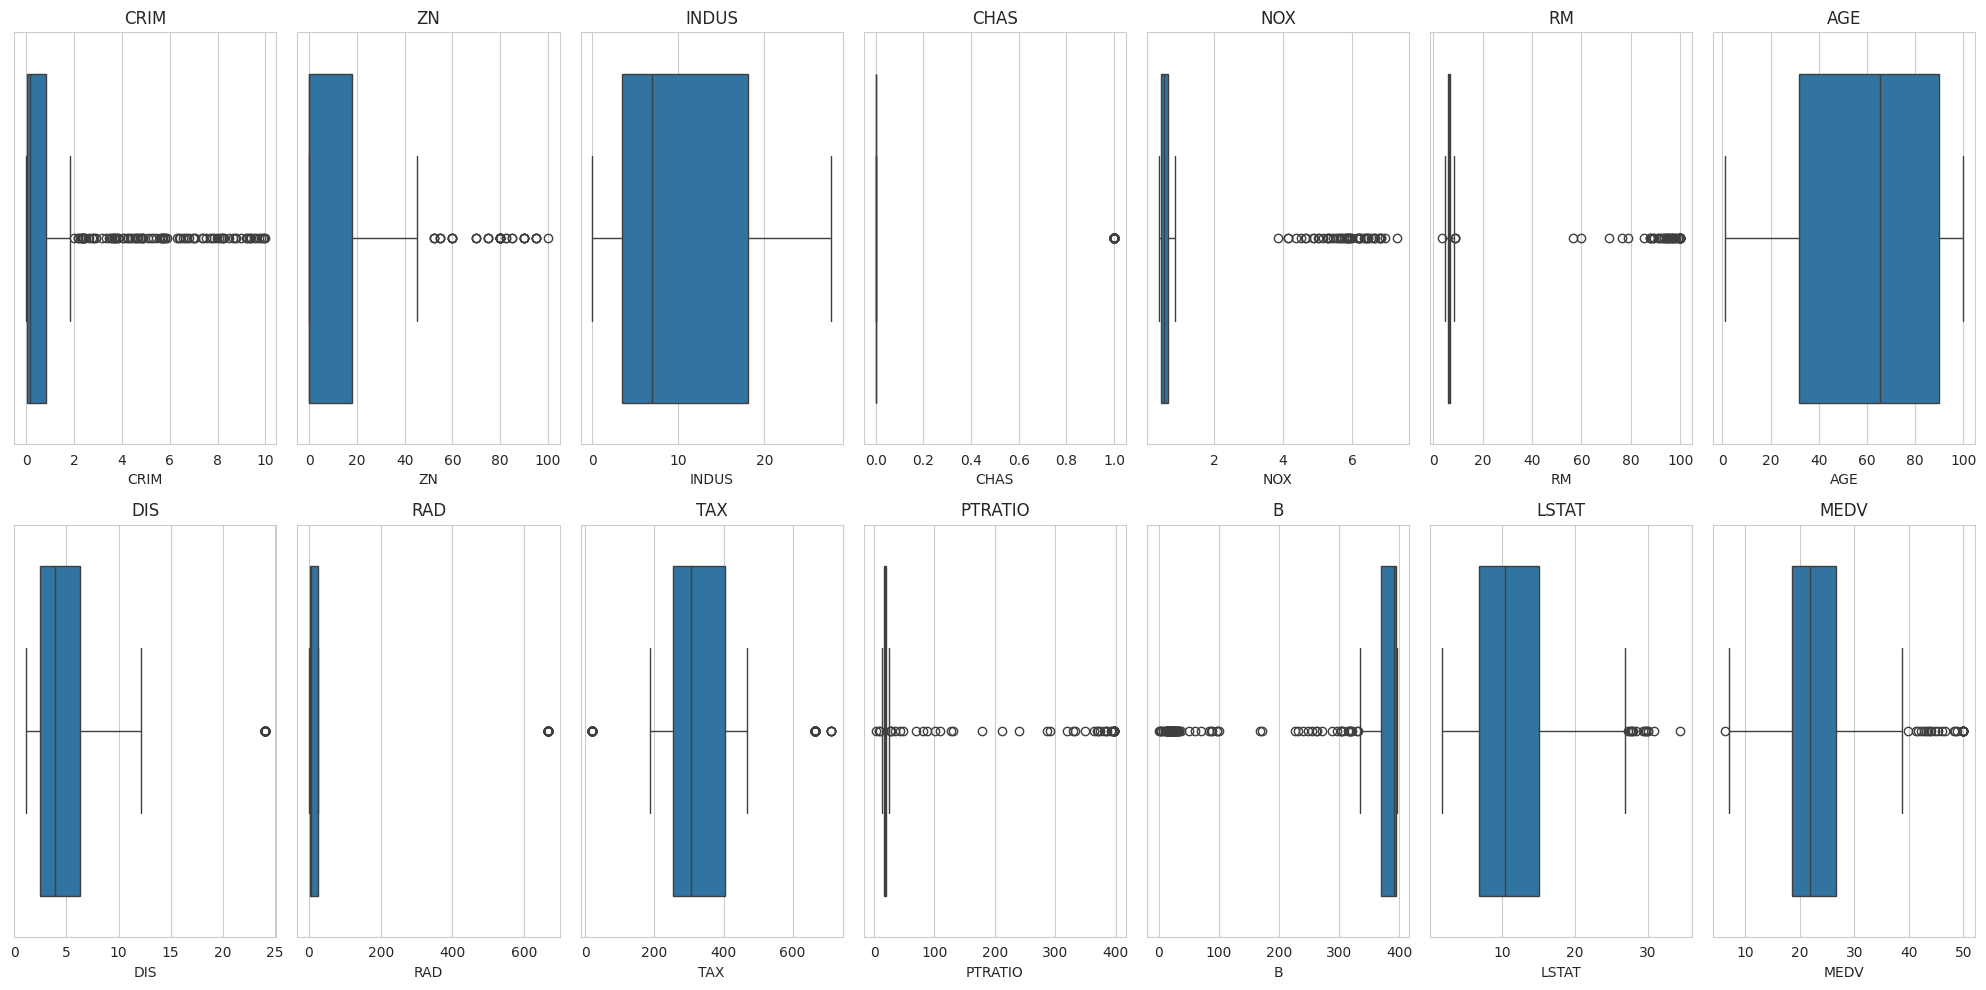

In [88]:
# Box Plots for The features
sns.set_style("whitegrid")
fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(20, 10))
axs = axs.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

## *Part2 : Preprocessing*

#### Question 7 : Handeling Missing Values


Handling missing values is an important preprocessing step in any machine learning project. There are several strategies for filling missing values, and the choice of strategy depends on the nature of the data and the specific requirements of our analysis. Here are some common techniques for filling missing values:

1. **Forward Fill (ffill) or Backward Fill (bfill)** : 
    Using the last observed value (forward fill) or the next observed value (backward fill) to fill missing values in a time series or sequential data is common.
    
2. **Mean/Median/Mode Imputation** : 
    Replacing missing values with the mean, median, or mode of the respective feature is a simple and commonly used approach.Using mean imputation for continuous numerical features, median imputation if the data is skewed or contains outliers, and mode imputation for categorical features is good.

3. **Predictive Imputation** :
    Training a machine learning model (e.g., regression, k-nearest neighbors) on the non-missing values and use it to predict the missing values.
    This approach can be computationally expensive but may provide more accurate imputations, especially for complex datasets.

4. **Interpolation** : 
    Using interpolation techniques such as linear interpolation, polynomial interpolation, or spline interpolation to estimate missing values based on the surrounding data points.

5. **Nearest Neighbors Imputation** :
    Using the values of the nearest neighbors (in terms of distance) to fill missing values. This approach works well for datasets with a spatial or temporal structure.


6. **Multiple Imputation** : 
    Generating multiple imputed datasets by imputing missing values multiple times using different imputation methods or models.
    Then combining the results from multiple imputed datasets to obtain more robust estimates and uncertainty estimates.



From the EDA part, we know that 4 features ( `CHAS` , `DIS` , `B` , `MEDV`) have missing values. 

`MEDV` is the target feature and since we are training a supervised model, without knowing the exact and true value of the target feature, we can't do a good prediction and build a reliable model. So it is best to exclude the rows that `MEDV` is missing.

For `DIS`, I'm going to use the median for filling because the skewness of it is very high based on the above plots.

For `B`, I'm going to use predictive imputation (random forest for the model) because it is an important feature and the properties of the feature are not such that we can use median or mean for filling the values.

At the end, I'm going to explain about `CHAS` in the next part.

In [89]:
df.dropna(subset=["MEDV"], inplace=True)
df["DIS"].fillna(df["DIS"].median(), inplace=True)

subset_A = df.dropna(subset=["B"]) 
subset_B = df[df["B"].isnull()]   

features = df.columns.drop(labels = ["B", "CHAS"])

X_train, X_val, y_train, y_val = train_test_split(subset_A[features], subset_A["B"], test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

predicted_values = model.predict(subset_B[features])

df.loc[df["B"].isnull(), "B"] = predicted_values

In [90]:
df.isnull().sum()  

CRIM        0
ZN          0
INDUS       0
CHAS       24
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV        0
dtype: int64

#### Question 8 : Deleting Features

Deleting a whole feature from the dataset needs careful consideration of its importance and contribution to the analysis or modeling task. Here are some factors we need to consider before deleting a feature :

1. **Irrelevant Features** : Features that do not provide any meaningful information or do not contribute to the analysis can be removed. 

2. **Features with Low Variance** : Features with low variance (i.e., features that have very little variability or are nearly constant across the dataset) may not be informative for modeling and can be removed. Low-variance features do not contribute much to the predictive power of the model.

3. **Highly Correlated Features** : If two or more features are highly correlated (i.e., they provide redundant information), we can consider removing one of them to reduce multicollinearity and improve model interpretability.

Based on these, we can remove `CHAS` feature from the dataset because it is a binary value that in lots of examples of this dataset (over 80 percent), the value of it is zero and also it has 27 misssing values which if we want to fill it, we should logically fill it with it's mode because it is a binary value and hence, the proportion of zeros will be much more too. Also, the importance of this feature in real world is very low too. So we can exclude the column of this feature and the correlation rate between this feature and the target variable is very low.

In [91]:
df_w_chas = df.copy()
df_w_chas["CHAS"].fillna(df_w_chas["CHAS"].median(),inplace=True)
df.drop(columns=["CHAS"], inplace=True)

#### Question 9 : Categorical and Numerical Features

1. **Numerical Features** : 
    Numerical features represent quantitative variables that have measurable numerical values. These variables can be discrete or continuous. All the features in this dataset are numerical.

2. **Categorical Features** : 
    Categorical features represent qualitative variables that belong to a finite set of categories or groups. These variables do not have inherent numerical values. In this dataset, we don't have straight categorical features but we can classify `RAD` and `CHAS` as categorical because `CHAS` is a binary feature (categorized into 2 categories) and `RAD` is the index of radial highways which are limited and determined.

#### Question 10 : Feature Scaling (Normalizing and Standardizing)

Normalizing and standardizing are both techniques used to preprocess numerical features in a dataset, but they serve different purposes and have different effects on the data. Here's an explanation of each and the differences between them:

1. **Normalizing**:

   Normalizing (also known as min-max scaling) is a preprocessing technique used to rescale numerical features to a common scale, typically between 0 and 1. It works by subtracting the minimum value of the feature and then dividing by the range (i.e. the difference between the maximum and minimum values). The formula for normalizing a feature $x$ is:

   $$x_{normalized} = \frac{x - \min(x)}{\max(x) - \min(x)}$$

   Normalizing is useful when:
   * The distribution of the features is not Gaussian (i.e., not normally distributed).
   * There is a need to bound the values of the features within a specific range (e.g., [0, 1]).

   However, normalizing does not handle outliers well, as it scales the data based on the minimum and maximum values, which can be heavily influenced by outliers.

2. **Standardizing**:

   Standardizing (also known as z-score normalization) is a preprocessing technique used to transform numerical features to have a mean of 0 and a standard deviation of 1. It works by subtracting the mean of the feature and then dividing by the standard deviation. The formula for standardizing a feature \( x \) is:

   $$ x_{standardized} = \frac{x - mean(x)}{std(x)} $$

   Standardizing is useful when:
   * The features have different scales and units of measurement.
   * The distribution of the features is approximately Gaussian (i.e., normally distributed).
   * There is a need to compare the relative importance of different features.

   Unlike normalizing, standardizing is less affected by outliers, as it uses the mean and standard deviation, which are more robust to outliers compared to the minimum and maximum values.

**Differences**:

- **Treatment of Outliers**: Standardizing is more robust to outliers compared to normalizing, as it is based on the mean and standard deviation rather than the minimum and maximum values.

- **Effect on Distribution**: Normalizing does not change the distribution shape of the features, while standardizing transforms the distribution to have a mean of 0 and a standard deviation of 1.

- **Range of Values**: Normalized features are scaled to a specific range (e.g., [0, 1]), while standardized features have a mean of 0 and a standard deviation of 1.

So for each algorithm, we will need a different scaling that is appropriate for that specific algorithm. For example, if an algorithm is not distance-based, feature scaling is unimportant, including Naive Bayes, Linear Discriminant Analysis, and Tree-Based models (gradient boosting, random forest, etc.). If our feature (column) contains outliers, normalizing our data will scale most of the data to a small interval, ensuring that all components have the same scale but failing to manage outliers adequately. Max-Min Normalization is rarely preferred over standardization since it is less resistant to outliers. I will use the appropriate scaling for each model in it's implementation seperately.

#### Question 11 : Preprocessing for Categorical Features

1. **Encoding Categorical Labels**:
   - Machine learning algorithms typically require numerical input data. Therefore, categorical labels need to be encoded into numerical values.
   - Two common encoding techniques are:
     - **Label Encoding**: Assigning a unique integer to each category.
     - **One-Hot Encoding**: Creating binary columns for each category, indicating its presence or absence.

2. **Ordinal Encoding**:
   - For ordinal categorical features (categories with a natural order or ranking), we may perform ordinal encoding to preserve the ordinal relationship.
   - Assigning numerical values to categories based on their order can be achieved using label encoding or custom mapping.

3. **Handling Missing Values**:
   - If categorical features have missing values, we need to decide how to handle them. Options include:
     - Treating missing values as a separate category.
     - Imputing missing values with the mode (most frequent category).
     - Dropping rows or columns with missing values, if appropriate.

4. **Handling High Cardinality**:
   - High cardinality categorical features (features with a large number of unique categories) can pose challenges in modeling.
   - Techniques to handle high cardinality include frequency encoding (encoding categories based on their frequency) or grouping rare categories into an "other" category.

5. **Feature Scaling**:
   - Although not specific to categorical features, feature scaling may be applied if the dataset contains both numerical and encoded categorical features. It ensures that all features are on a similar scale, which can improve the performance of certain algorithms.


#### Question 12 : Train , Test , Validation

Train, test, and validation sets are subsets of a dataset used in machine learning for different purposes during the development and evaluation of models:

1. **Training Set**:
   - The training set is the portion of the dataset used to train the machine learning model.
   - It contains examples (data points) with known input-output pairs, where the input features are used to train the model, and the corresponding output labels (targets) are used to learn the mapping between inputs and outputs.
   - The model adjusts its parameters (weights and biases) based on the input-output pairs in the training set to minimize the prediction error.

2. **Test Set**:
   - The test set is a separate portion of the dataset used to evaluate the performance of the trained model.
   - It contains examples that the model has not seen during training.
   - After training the model on the training set, we use the test set to assess how well the model generalizes to new, unseen data.
   - The test set provides an estimate of the model's performance on new data and helps detect overfitting.

3. **Validation Set**:
   - The validation set is an optional subset of the dataset used for hyperparameter tuning and model selection.
   - It is similar to the test set but is used during the training process to fine-tune model hyperparameters (e.g., learning rate, regularization strength) and compare different models.
   - The validation set helps prevent overfitting by providing an independent dataset for optimizing model performance.

In [92]:
st = StandardScaler()
min_max_s = MinMaxScaler()
norm = Normalizer()

feature_ex_medv = [col for col in df.columns if col != "MEDV"]
temp = pd.DataFrame(st.fit_transform(df[feature_ex_medv]), columns=feature_ex_medv, index=df.index) 
df_st = pd.concat([temp, df["MEDV"]], axis=1)
X_train_val, X_test, y_train_val, y_test = train_test_split(df_st.drop(columns=['MEDV']), df_st['MEDV'], test_size=0.1, random_state=228)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.111,random_state=220)

temp_1 = pd.DataFrame(norm.fit_transform(df[feature_ex_medv]), columns=feature_ex_medv, index=df.index) 
df_norm = pd.concat([temp_1, df["MEDV"]], axis=1)
X_train_val_norm, X_test_norm, y_train_val_norm, y_test_norm = train_test_split(df_st.drop(columns=['MEDV']), df_st['MEDV'], test_size=0.1, random_state=228)
X_train_norm, X_val_norm, y_train_norm, y_val_norm = train_test_split(X_train_val_norm, y_train_val_norm, test_size=0.111,random_state=220)

#### Question 13 : Other Preprocessing Methods

1. **Outlier Removal**:
   - Identify and remove outliers from the dataset to prevent them from unduly influencing the model. Outlier detection techniques include:
     - Z-score: Identify data points that fall outside a specified number of standard deviations from the mean.
     - IQR (Interquartile Range): Identify data points that fall outside a specified range of percentiles.

2. **Feature Engineering**:
   - Create new features from existing ones to capture more information or improve model performance. Feature engineering techniques include:
     - Polynomial features: Create new features by raising existing features to a higher power.
     - Interaction features: Create new features by multiplying or combining existing features.
     - Domain-specific transformations: Apply domain knowledge to create features that are more informative.

3. **Dimensionality Reduction**:
   - Reduce the number of features in the dataset while preserving most of the relevant information. Dimensionality reduction techniques include:
     - Principal Component Analysis (PCA): Transform the original features into a lower-dimensional space while retaining most of the variance in the data.
     - Feature selection: Select a subset of the most important features based on statistical tests, feature importance scores, or domain knowledge.

4. **Normalization of Target Variable**:
   - If the target variable is skewed or has a non-normal distribution, apply transformations such as logarithmic transformation to make it more normally distributed. This can improve model performance, especially for regression tasks.

5. **Handling Imbalanced Classes**:
   - Address imbalanced class distributions by resampling techniques such as:
     - Oversampling: Increase the number of instances in the minority class.
     - Undersampling: Decrease the number of instances in the majority class.

6. **Handling Cyclical Features**:
   - For features representing cyclical patterns (e.g., time of day, month), encode them in a way that preserves their cyclical nature. For example, encode months as sin and cos transformations of the month number to capture seasonal patterns.

## *Part3 : Training, Evaluating and Deciding*

### PHASE1 : Linear Regression

#### Question 14 : Supervised, Unsupervised, Semi-supervised and Reinforcement Learning

**Supervised Learning**:
- In supervised learning, the algorithm learns from labeled data, where each training example is paired with an associated label or target.
- Tasks include classification (predicting a discrete label) and regression (predicting a continuous value).

- *Examples*:
  - Classification: Email spam detection.
  - Regression: House price prediction.

**Unsupervised Learning**:
- In unsupervised learning, the algorithm learns from unlabeled data, aiming to discover patterns, structures, or relationships within the data.
- Tasks include clustering (grouping similar data points together) and dimensionality reduction.

- *Examples*:
  - Clustering: Customer segmentation in marketing.
  - Dimensionality reduction: Principal Component Analysis (PCA).

**Semi-supervised Learning**:
- Combines elements of supervised and unsupervised learning, leveraging a small amount of labeled data along with a larger amount of unlabeled data.
- Used to improve the performance of supervised learning models.
- Semi-supervised learning is particularly useful when there is a large amount of unlabeled data available, but it’s too expensive or difficult to label all of it. 

- *Examples*:
  - Speech Analysis: Since labeling audio files is a very intensive task, Semi-Supervised learning is a very natural approach to solve this problem.

  - Internet Content Classification: Labeling each webpage is an impractical and unfeasible process and thus uses Semi-Supervised learning algorithms. Even the Google search algorithm uses a variant of Semi-Supervised learning to rank the relevance of a webpage for a given query.

**Reinforcement Learning**:
- An agent learns to make sequential decisions in an environment to maximize cumulative rewards.
- The goal is to learn a policy that maximizes the long-term cumulative reward.
- It uses algorithms that learn from outcomes and decide which action to take next. After each action, the algorithm receives feedback that helps it determine whether the choice it made was correct, neutral or incorrect. It is a good technique to use for automated systems that have to make a lot of small decisions without human guidance.

- *Examples*:
  - Game playing: AlphaGo.
  - Robotics: Training robots to perform tasks.

**Differences**:
- **Supervised vs. Unsupervised Learning**: Supervised learning uses labeled data, while unsupervised learning uses unlabeled data.

- **Semi-supervised vs. Reinforcement Learning**: Semi-supervised learning leverages both labeled and unlabeled data, while reinforcement learning focuses on learning from feedback in an interactive environment.

- **Supervised vs. Reinforcement Learning**: Supervised learning predicts outputs from inputs based on labeled examples, while reinforcement learning makes sequential decisions to maximize cumulative rewards.



#### Question 15 : Regression and Differences with Classification methods

Regression is a supervised machine learning technique, used to predict the value of the dependent variable for new, unseen data. It models the relationship between the input features and the target variable, allowing for the estimation or prediction of numerical values.

Regression analysis problem works with if output variable is a real or continuous value, such as “salary” or “weight”. Many different models can be used, the simplest is the linear regression. It tries to fit data with the best hyper-plane which goes through the points.

**Assumptions**:
- Regression analysis relies on several key assumptions, including:
  - Linearity : The relationship between the dependent and independent variables is linear.
  - Normality : The errors are normally distributed.
  - Independence : Observations are independent of each other.
  - Homoscedasticity : The variance of the errors is constant across all levels of the independent variables.

Regression and classification have many differences in different aspects that I will mention below : 

1. **Objective**:
   - **Regression**: Predicts a continuous numerical value by modeling the relationship between independent variables and the continuous outcome.

   - **Classification**: Predicts a categorical label or class by assigning each input instance to one of a finite number of predefined classes.

2. **Output**:
   - **Regression**: Produces a continuous numerical value, such as house prices or temperature.

   - **Classification**: Produces a categorical label or class, such as spam or not spam, malignant or benign tumor.

3. **Model Representation**:
   - **Regression**: Typically represented by mathematical functions, like linear equations or polynomial functions.

   - **Classification**: Decision boundaries separating different classes may be linear or nonlinear.

4. **Evaluation Metrics**:
   - **Regression**: Evaluation metrics include MSE, RMSE, MAE, and R-squared.

   - **Classification**: Evaluation metrics include accuracy, precision, recall and F1-score.

5. **Examples**:
   - **Regression**: Predicting house prices, sales revenue, or temperature.
   
   - **Classification**: Spam email detection, sentiment analysis, medical diagnosis, image recognition.

#### Question 16 : Explanation About The Equations for Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable (also known as the target variable) and one or more independent variables (also known as predictor variables or features). It assumes a linear relationship between the independent variables and the dependent variable, meaning that the change in the dependent variable is proportional to the change in the independent variables.
Main form of simple linear regression function is like below:
$$f(x) = \alpha x + \beta$$

Where : 
- $f(x)$ is the dependent variable (target variable).

- $x$ is the independent variable (predictor variable)(one of the features other than the target feature).

- $\alpha$ is the slope coefficient, representing the change in $f(x)$ for a one-unit change in $x$. 

- $\beta$ is the intercept, representing the value of $f(x)$ when $x$ is zero.

Now I will explain RSS which is the cost function of our linear regression model : 


RSS stands for Residual Sum of Squares, and it is a commonly used metric in regression analysis to measure the discrepancy between the observed values of the dependent variable and the values predicted by the regression model. In other words, it quantifies the difference between the actual values of the target variable and the values predicted by the regression equation. Mathematically, the RSS is calculated as the sum of the squared differences between the observed valuesand the predicted values for each data point :

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

The goal of linear regression is to minimize the RSS, which means finding the regression coefficients (intercept and slope) that result in the smallest sum of squared residuals. Minimizing the RSS essentially means finding the "best-fitting" line or plane (in the case of multiple regression) that describes the relationship between the independent and dependent variables. We can do this by computing the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters :

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$


#### Question 17 : Choosing The Most Appropriate Feature For The Input of Regression Function

The closer the correlation coefficient is to 1 (positive correlation) or -1 (negative correlation), the stronger the relationship between the feature and the target variable. So we should choose the feature with the highest absolute correlation coefficient which in our dataset (based on EDA part), `RM` and `LSTAT` have the highest correlation with the target variable.

In [93]:
class linear_regression:
    def __init__(self):
        self.intercept = None
        self.slope = None

    def fit(self, X, y):
        x_mean = np.mean(X)
        y_mean = np.mean(y)
        
        numerator = np.sum((X - x_mean) * (y - y_mean))
        denominator = np.sum((X - x_mean) ** 2)
        self.slope = numerator / denominator

        self.intercept = y_mean - self.slope * x_mean

    def predict(self, X):
        return self.intercept + self.slope * X
    
    def get_r2_score(self, predicted_values, actual_values):
        y_mean = np.mean(actual_values)
        tss = np.sum((actual_values - y_mean) ** 2)
        rss = np.sum((actual_values - predicted_values) ** 2)
        r2 = 1 - (rss / tss)
        return r2
    
    def get_root_mean_square_error(self, predicted_values, actual_values):
        return np.sqrt(np.mean(np.square(np.subtract(predicted_values , actual_values))))
    
    def get_intercept(self):
        return self.intercept  
    
    def get_slope(self):
        return self.slope

#### Question 18 : RSS , MSE , RMSE , R2 Score


1. **Residual Sum of Squares (RSS)**:
   - RSS measures the total squared difference between the actual values of the target variable and the predicted values from the regression model.
   - It quantifies the discrepancy between the observed and predicted values, with lower RSS indicating a better fit of the model to the data.
   - Mathematically, RSS is calculated as the sum of the squared residuals (errors):
     $$ \text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
     where $n$ is the number of observations, $y_i$ is the actual value of the target variable for the $i$-th observation, and $\hat{y}_i$ is the predicted value of the target variable for the $i$-th observation.

2. **Mean Squared Error (MSE)**:
   - MSE is the average of the squared differences between the actual and predicted values of the target variable.
   - It provides a measure of the average magnitude of the errors between the observed and predicted values.
   - Mathematically, MSE is calculated as the mean of the squared residuals:
     $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

3. **Root Mean Squared Error (RMSE)**:
   - RMSE is the square root of the MSE and provides a measure of the average magnitude of the errors in the same units as the target variable.
   - It is particularly useful for interpreting the scale of the errors in the context of the problem domain.
   - Mathematically, RMSE is calculated as the square root of the MSE:
     $$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$

4. <b> $R^2$ Score </b> :
   - $R^2$ score measures the proportion of the variance in the target variable that is explained by the regression model.
   - It represents the goodness of fit of the model to the data, with higher $R^2$ indicating a better fit.
   - $R^2$ score ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates no improvement over the mean prediction.
   - Mathematically, $R^2$ score is calculated as:
     $$ R^2 = 1 - \frac{\text{RSS}}{\text{TSS}} $$
     where TSS (Total Sum of Squares) is the sum of the squared differences between the actual values and the mean of the target variable:
     $$ \text{TSS} = \sum_{i=1}^{n} (y_i - \bar{y})^2 $$
     and $\bar{y}$ is the mean of the target variable.

#### Question 19 : Evaluation The Model

As we can see from the results, the highest R2 score is for `RM` that is 0.868 and the second highest is for `LSTAT` that is 0.47. This is because these two features had the most correlation with the target feature as we see in the correlation heatmap. Also some of r2 scores are negative that means that the model fits the data worse than a horizontal line. In other words, it suggests that the model does not explain any of the variance in the target variable beyond what would be expected by random chance. This is because of that these features are not properly correlated with the target and also they have lots of outliers that with removing them, we might get better predictions by these features but still not even close to the features that I mentioned first. On the other hand, the RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. However, the less RMSE is, the better it is in comparision to the RMSE value of other fratures. For RMSE, this score is much less for `RM` and `LSTAT` too. 

In [94]:
dictio_1 = dict()
dictio_2 = dict()
for feature in X_train.columns:
    model = linear_regression()
    print(feature + ":")
    model.fit(X_train[feature].values, y_train.values)

    predicted_values = model.predict(X_test[feature].values)
    r2 = model.get_r2_score(predicted_values, y_test.values)
    rmse = model.get_root_mean_square_error(predicted_values, y_test.values)
    dictio_1[feature] = predicted_values
    dictio_2[feature] = (model.get_intercept(), model.get_slope())

    print ("Intercept: " , model.get_intercept())
    print ("Slope: " , model.get_slope())
    print ("R2 Score: " , r2)
    print ("RMSE Score: " , rmse)
    print ("----------------------")

CRIM:
Intercept:  23.945089565485244
Slope:  -2.6347680245488756
R2 Score:  0.05399356507232089
RMSE Score:  9.113597868531924
----------------------
ZN:
Intercept:  23.694639225002863
Slope:  3.06825445968145
R2 Score:  -0.028195166726292964
RMSE Score:  9.501246716263942
----------------------
INDUS:
Intercept:  23.88048684271683
Slope:  -4.0859485177099835
R2 Score:  -0.10072540266548047
RMSE Score:  9.830651739635087
----------------------
NOX:
Intercept:  23.759937946858525
Slope:  -3.5710238273061297
R2 Score:  -0.12235684109779421
RMSE Score:  9.92677767826594
----------------------
RM:
Intercept:  23.653735846177366
Slope:  7.082978376964538
R2 Score:  0.8685716558672613
RMSE Score:  3.39693576483541
----------------------
AGE:
Intercept:  23.754737696591526
Slope:  -3.0735133182362073
R2 Score:  -0.15019633192193682
RMSE Score:  10.049137892017095
----------------------
DIS:
Intercept:  23.823125010851484
Slope:  1.3943182496773412
R2 Score:  -0.056327449833404986
RMSE Score: 

#### Question 20 : Compare Using Plots

As we can see below, I have make 2 kinds of plot. The first one indicatees the different of predicted values from real values(x = y line) and the second type indicates the predicted line in comparision to real datapoints. By looking at these plots, we can clearly see the outliers and the amount of well fitting of the predicted line to the real values. As we can see, the lines for `RM` and `LSTAT` are well-fitted in comparision to other lines for other features.

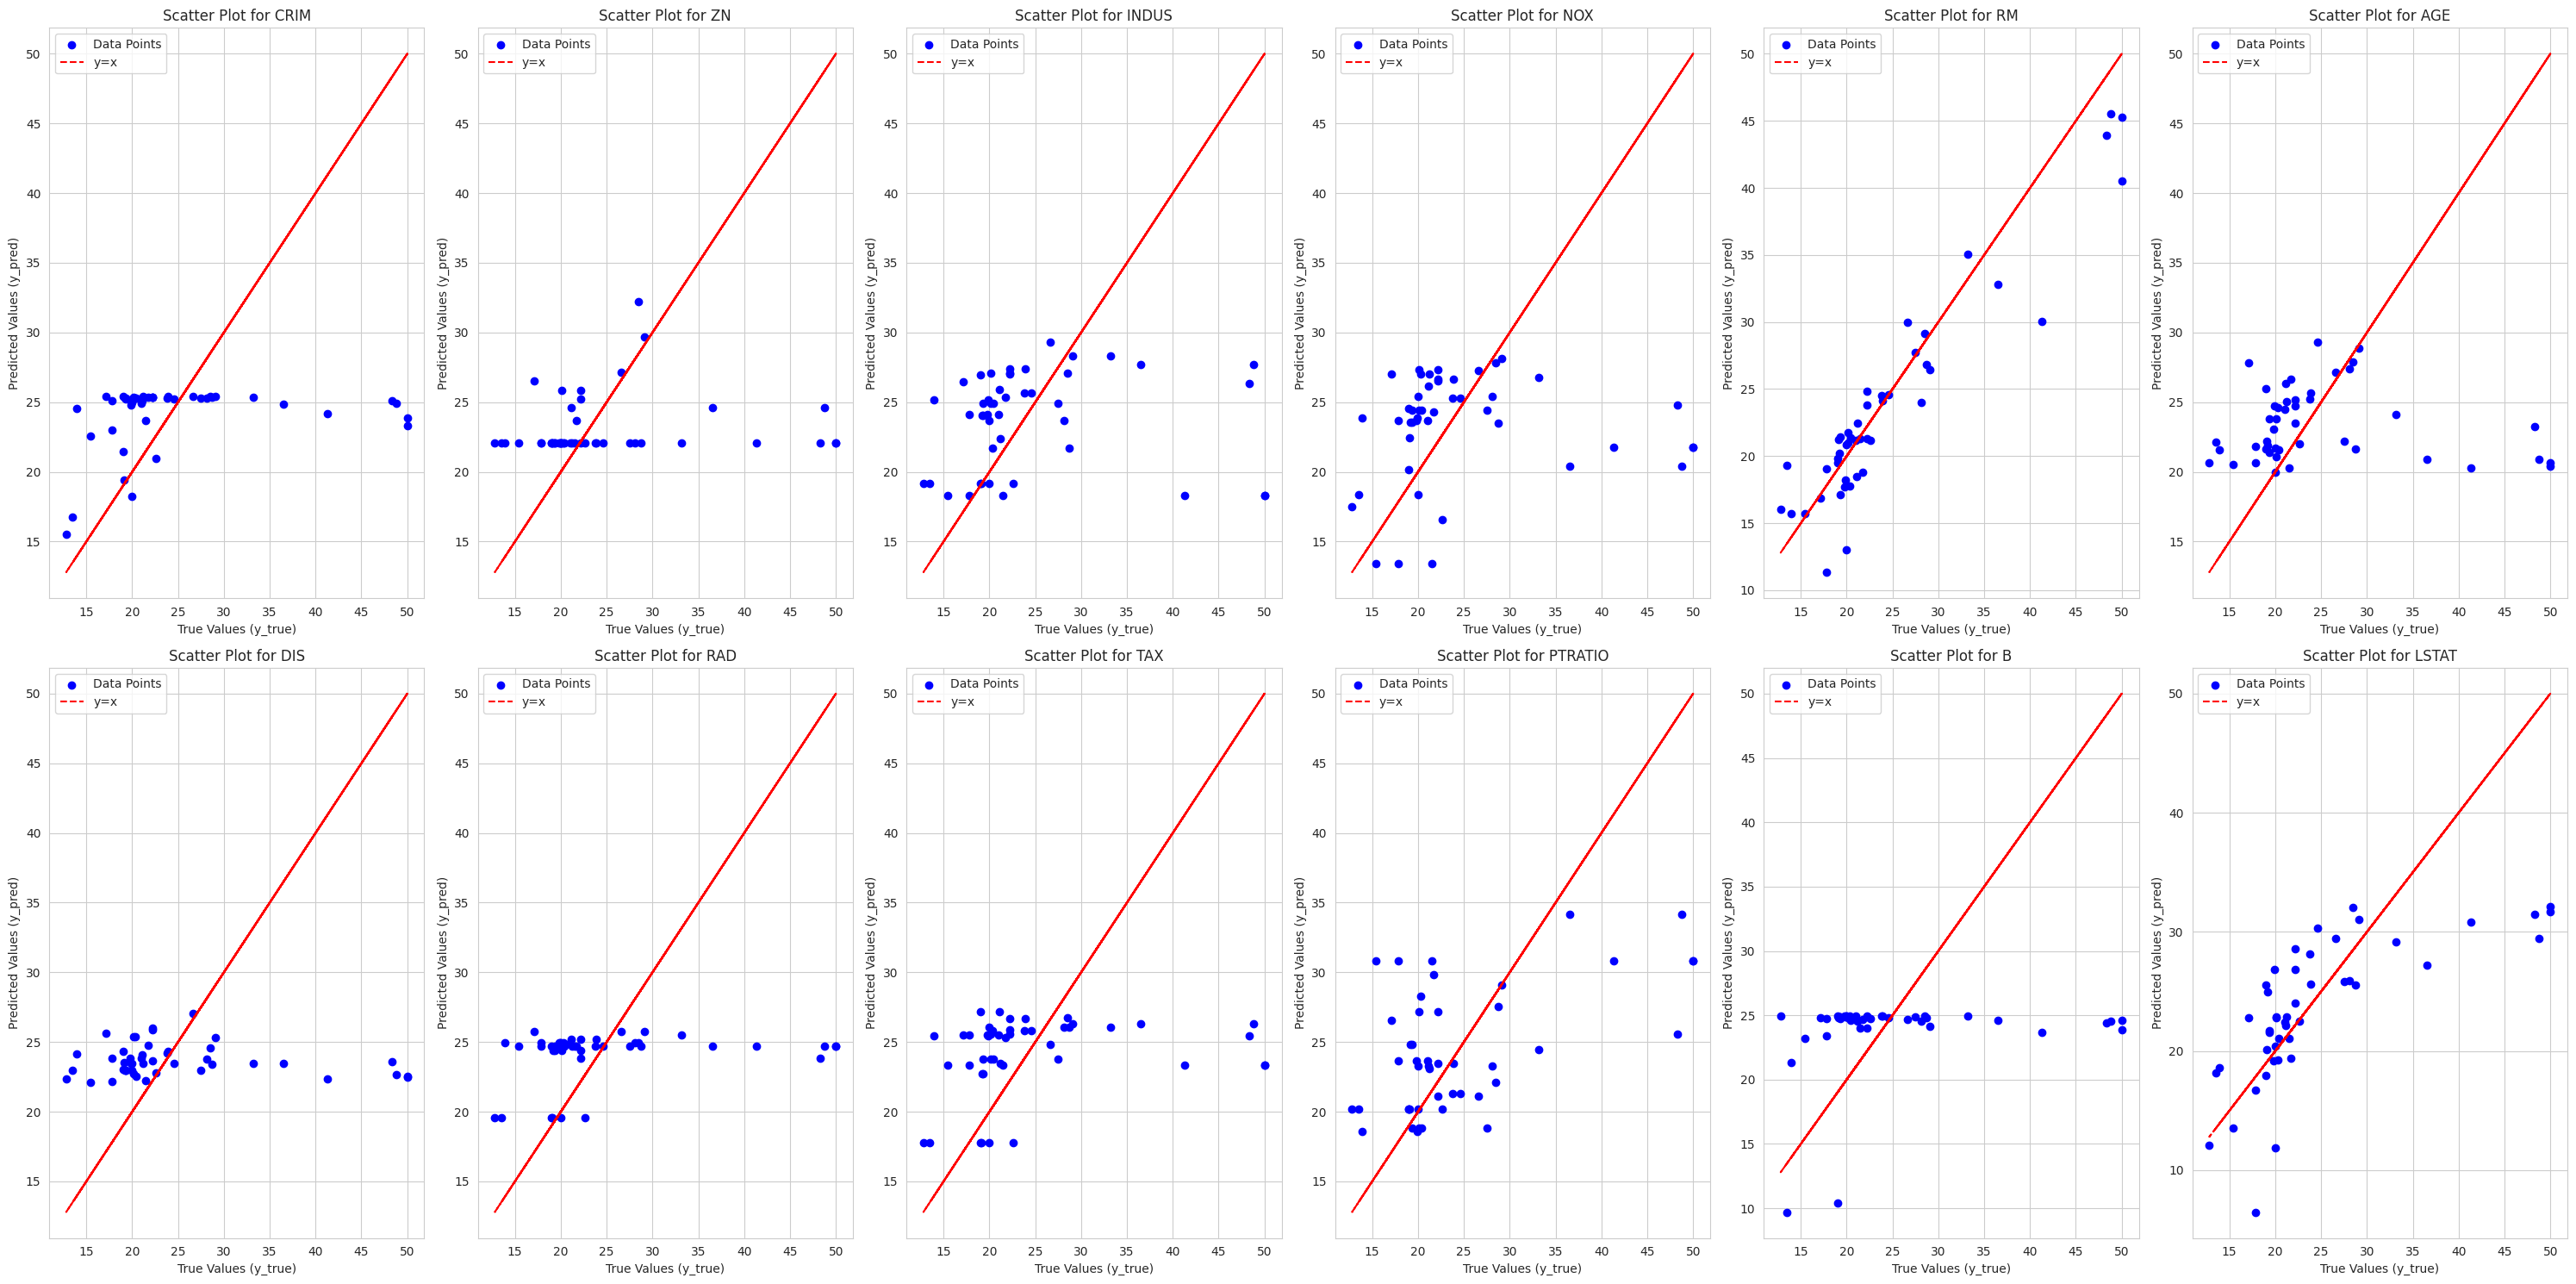

In [95]:
num_plots = len(dictio_1)
num_rows = 2
num_cols = (num_plots + 1) // 2 

fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 15))

if num_rows == 1:
    axs = axs.reshape(1, -1)

for idx, (key, value) in enumerate(dictio_1.items()):
    y_pred = value
    y_true = y_test.values
    
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    axs[row_idx, col_idx].scatter(y_true, y_pred, color='blue', label='Data Points')
    axs[row_idx, col_idx].plot(y_true, y_true, color='red', linestyle='--', label='y=x')
    
    axs[row_idx, col_idx].set_xlabel('True Values (y_true)')
    axs[row_idx, col_idx].set_ylabel('Predicted Values (y_pred)')
    axs[row_idx, col_idx].set_title(f'Scatter Plot for {key}')

    axs[row_idx, col_idx].legend()

plt.tight_layout()

plt.show()

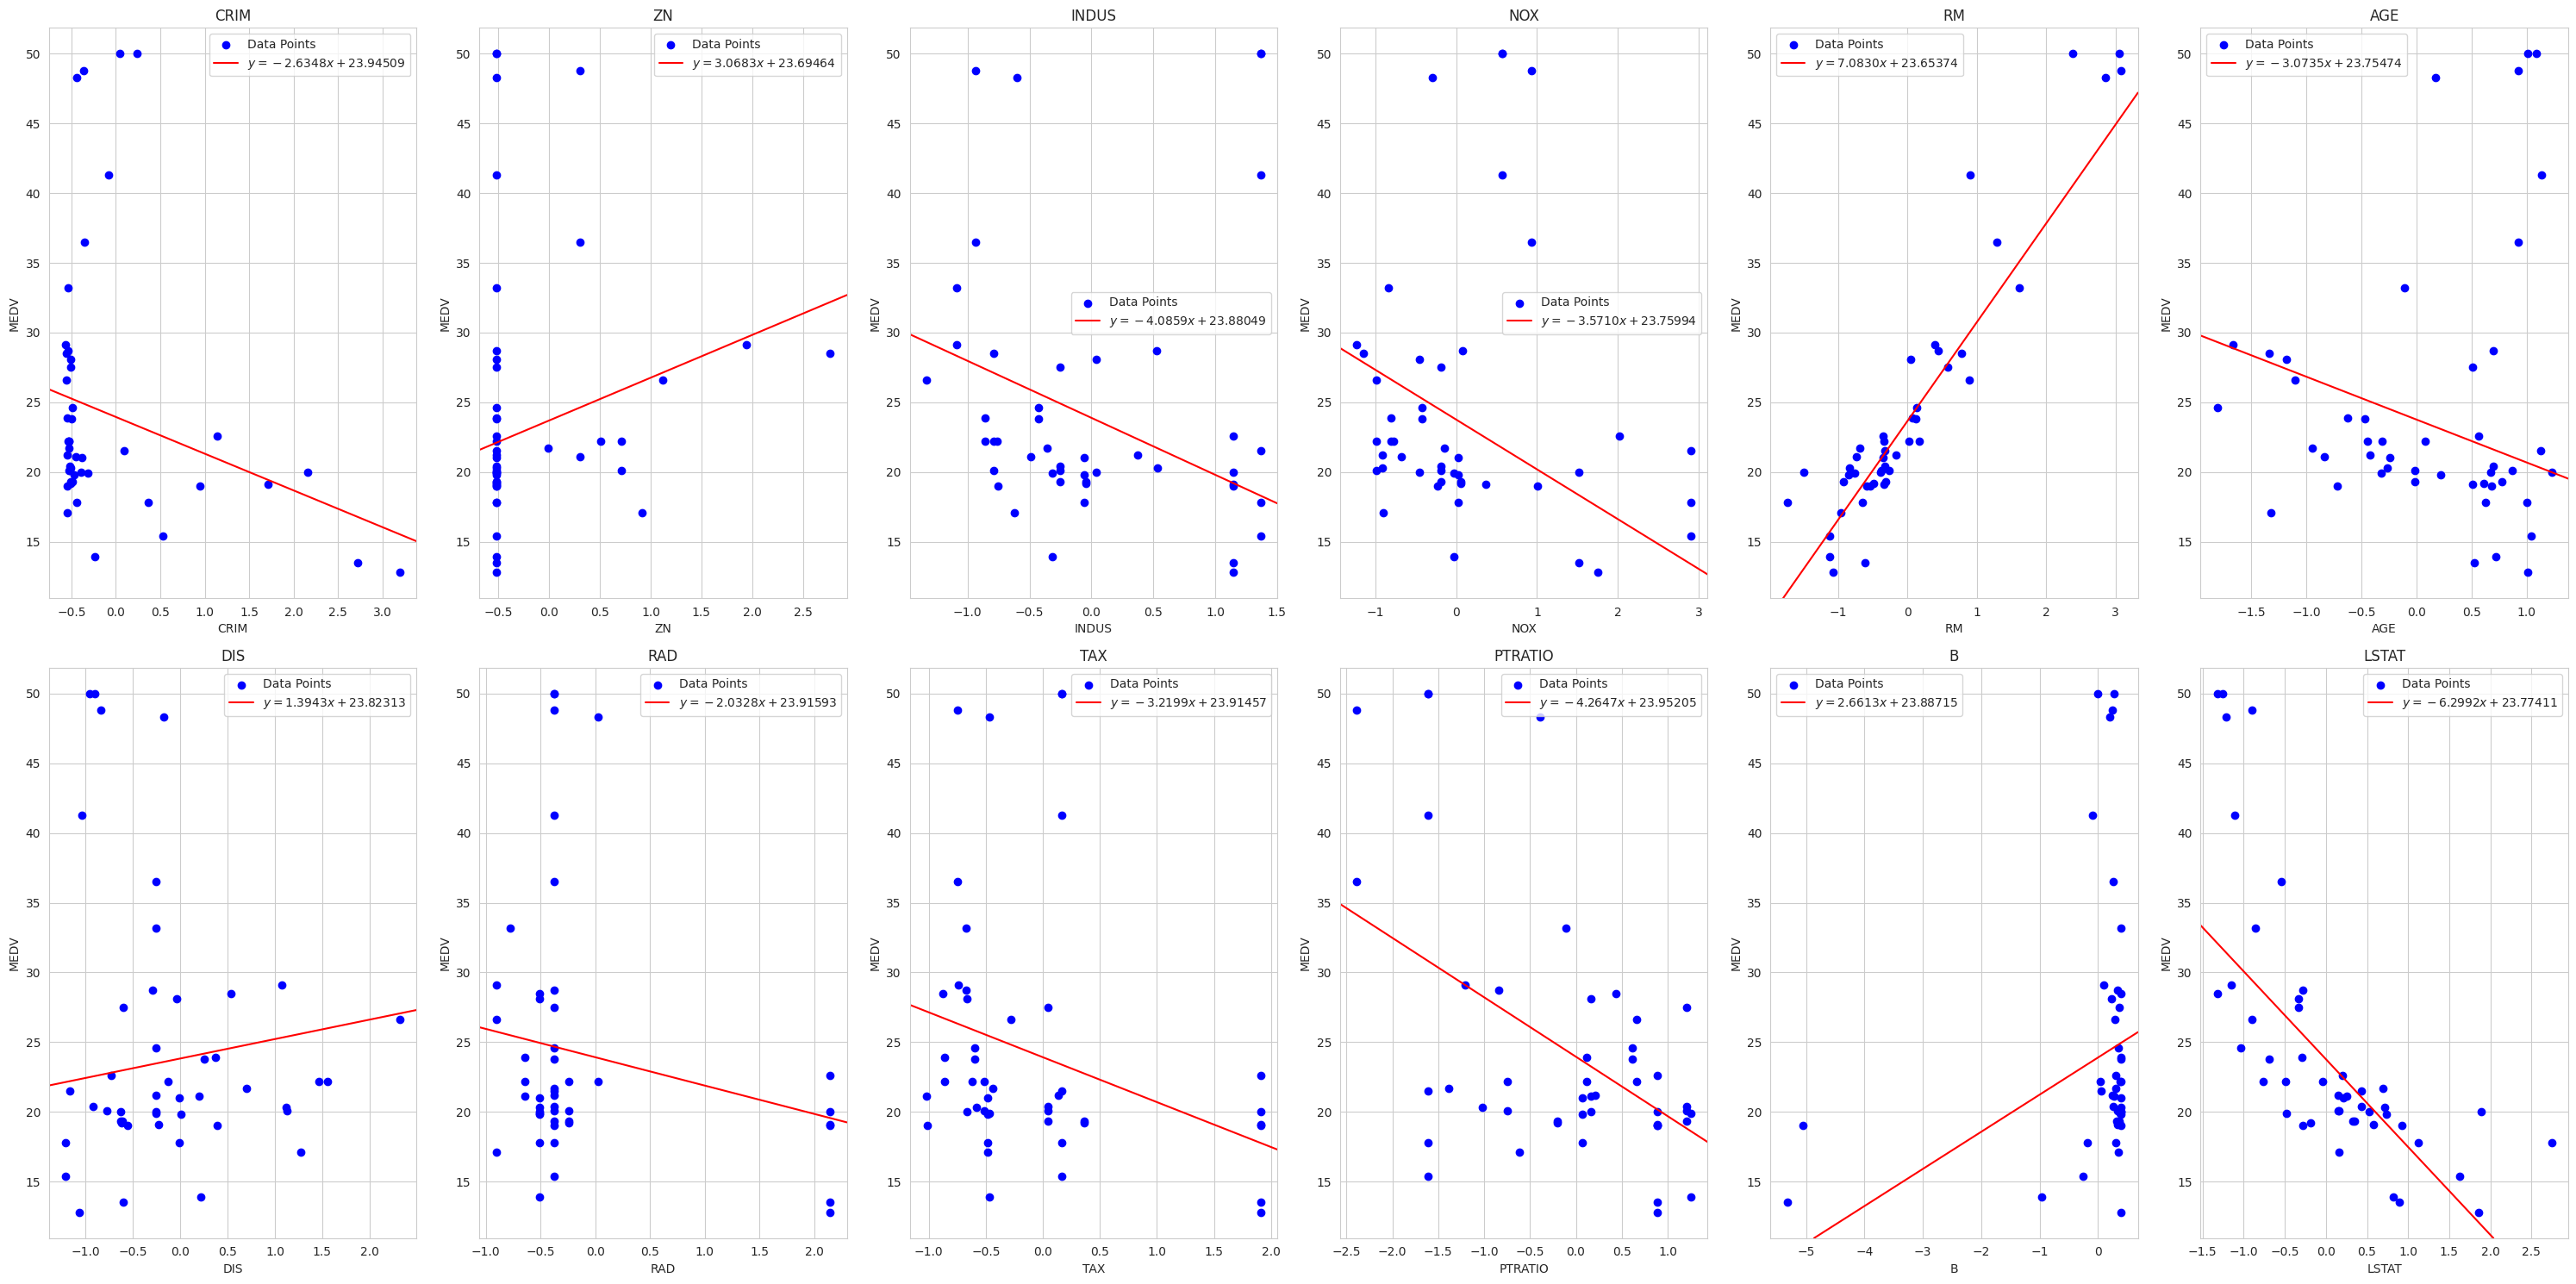

In [96]:
num_plots = len(dictio_2)
num_rows = 2
num_cols = (num_plots + 1) // 2 

fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 15))

if num_rows == 1:
    axs = axs.reshape(1, -1)

for idx, (key, value) in enumerate(dictio_2.items()):
    intercept, slope = value
    
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    axs[row_idx, col_idx].scatter(X_test[key], y_test.values, color='blue', label='Data Points')
    axs[row_idx, col_idx].axline((0, intercept), slope=slope, color='red', label=f'$y = {slope:.4f}x {intercept:+.5f}$')
    
    axs[row_idx, col_idx].set_xlabel(key)
    axs[row_idx, col_idx].set_ylabel('MEDV')
    axs[row_idx, col_idx].set_title(key)

    axs[row_idx, col_idx].legend()

plt.tight_layout()

plt.show()

### PHASE3 : Classification

#### Question 21 : Pruning In Decision Trees

Pruning in decision trees is a technique used to prevent overfitting by reducing the size or complexity of the tree. Overfitting occurs when the model captures noise or random fluctuations in the training data, resulting in poor generalization to unseen data. Pruning aims to strike a balance between model complexity and predictive accuracy, leading to better performance on unseen data.

There are two main types of pruning techniques:

1. **Pre-pruning**: Pre-pruning involves stopping the growth of the decision tree before it becomes too complex. This is achieved by setting stopping criteria or constraints on the tree's growth during the learning process. Common pre-pruning techniques include:

   - **Minimum Impurity Decrease**: Requiring a minimum decrease in impurity (e.g., Gini impurity, entropy) when performing a split. If the impurity decrease is below the threshold, the split is not performed, ensuring that only meaningful splits that improve the purity of the resulting nodes are considered.
   
   - **Maximum Depth**: Limiting the maximum depth of the tree. Once the tree reaches the specified depth, further splitting stops, preventing the tree from becoming too deep and complex.
   
   - **Minimum Samples per Leaf**: Requiring a minimum number of samples to be present in each leaf node. If a split would result in a leaf node with fewer samples than the specified threshold, the split is not performed, preventing the creation of small, potentially noisy leaf nodes.

2. **Post-pruning**: Post-pruning, also known as backward pruning or reduced-error pruning, involves growing the full decision tree and then removing or collapsing certain branches (subtrees) to improve the model's generalization performance. This is typically done after the tree has been fully trained using a validation set or cross-validation. The key idea is to evaluate the impact of removing each subtree on the model's performance and remove subtrees that do not significantly improve the model's predictive accuracy.

   - **Cost-Complexity Pruning**: In cost-complexity pruning, each subtree is associated with a cost that penalizes its complexity. The cost is typically defined based on the number of nodes, depth, or other complexity measures. Pruning proceeds by iteratively removing the subtrees with the smallest cost, resulting in a simpler tree that maintains or improves predictive accuracy.

##### Pros of Pruning:

1. **Prevents Overfitting**: Pruning helps prevent overfitting by reducing the size or complexity of the decision tree. This results in a model that generalizes better to unseen data.

2. **Improves Interpretability**: Pruned decision trees are simpler and easier to interpret compared to unpruned trees. They contain fewer branches and nodes, making it easier to understand the decision-making process.

3. **Reduces Computational Complexity**: Pruning reduces the computational complexity of the decision tree model, resulting in faster training and inference times.

4. **Enhances Model Robustness**: By removing unnecessary branches or subtrees, pruning helps create a more robust decision tree model that is less sensitive to noise or outliers in the training data.

##### Cons of Pruning:

1. **Loss of Information**: Pruning may lead to a loss of information or predictive power, especially if important subtrees or branches are removed from the tree.

2. **Requires Tuning**: Pruning techniques often require tuning hyperparameters, such as the maximum depth or minimum samples per leaf, which can be time-consuming and require domain knowledge or experimentation.

3. **Potential Underfitting**: Over-pruning, or removing too many branches from the tree, can lead to underfitting, where the model is too simplistic and fails to capture important patterns in the data.

4. **Dependence on Quality of Validation Set**: Post-pruning techniques rely on the quality of the validation set used to evaluate the impact of removing subtrees. If the validation set is not representative of the data, pruning may not yield optimal results.

#### Question 22 : Advantages Using Decision Trees

Decision trees can be advantageous in several scenarios compared to other machine learning models:

1. **Interpretability**: Decision trees provide a clear and intuitive representation of the decision-making process, making them easy to understand and interpret. This makes decision trees particularly useful in domains where interpretability is crucial, such as medicine or finance.

2. **Scalability**: Decision trees are relatively simple and computationally efficient compared to some other models, such as deep neural networks. They can handle large datasets and are scalable to high-dimensional feature spaces.

3. **Robustness to Outliers and Missing Values**: Decision trees are robust to outliers and missing values in the data. They can handle noisy datasets and still produce reasonable results without the need for extensive data preprocessing.

4. **Mixed Data Types**: Decision trees can handle both numerical and categorical features without the need for one-hot encoding or other preprocessing techniques. This makes them versatile and efficient for datasets with mixed data types.

5. **Handling Nonlinear Relationships**: Decision trees can capture nonlinear relationships between features and the target variable without requiring complex transformations or feature engineering. This makes them well-suited for datasets with nonlinear relationships or interactions.

6. **Ensemble Methods**: Decision trees can be easily combined into ensemble methods, such as random forests or gradient boosting, to further improve predictive performance. These ensemble methods often outperform individual decision trees and are commonly used in practice.

#### Question 23 : Differences Between KNN And Other Classification Algorithms

1. **Algorithm Type**:
   - KNN is a non-parametric and instance-based learning algorithm. It doesn't learn explicit models from the training data but instead memorizes the entire training dataset.

   - Neural networks are a type of parametric model that learn complex patterns through interconnected layers of neurons, weights, and activation functions.

   - Logistic regression is a linear model used for binary classification. It models the probability that a given input belongs to a particular class using a logistic function.

2. **Training**:
   - KNN does not have a training phase as such. During the testing phase, it calculates the distances between the test instance and all training instances to find the nearest neighbors.

   - Neural networks and logistic regression require training on labeled data to learn the parameters that best fit the training data.

3. **Decision Boundary**:
   - KNN's decision boundary is nonlinear and depends on the distribution of training instances. It's more flexible and can capture complex decision boundaries.

   - Neural networks can learn complex nonlinear decision boundaries through the activation functions and interconnected layers, making them highly flexible.

#### Question 24 : One Nearest Neighbor

The "one nearest neighbor" algorithm, often referred to as 1-NN, is a simple instance-based learning algorithm used for classification tasks. It belongs to the family of K-Nearest Neighbors (KNN) algorithms, where K is set to 1.

##### How 1-NN works:

1. **Training Phase**: 
   - The algorithm does not have a traditional training phase. Instead, it memorizes the entire training dataset.

2. **Testing Phase**:
   - Given a new, unseen instance for classification, the algorithm calculates the distance between this instance and all instances in the training dataset using a distance metric such as Euclidean distance.
   - It identifies the closest instance (nearest neighbor) to the new instance based on the calculated distances.
   - The class label of the nearest neighbor is assigned to the new instance as its predicted class.

##### Pros of 1-NN algorithm:

1. **Simplicity**: 1-NN is straightforward and easy to understand. It doesn't involve complex calculations or parameters.
   
2. **Non-parametric**: Being a non-parametric algorithm, 1-NN makes no assumptions about the underlying data distribution. It can model complex decision boundaries effectively.

3. **Adaptability**: 1-NN can adapt to changes in the data dynamically. It doesn't require retraining the model when new data is added; it simply updates its knowledge base.

4. **Interpretability**: The decision-making process of 1-NN is transparent. Predictions are based on the actual instances in the dataset, making it easy to interpret and explain.

##### Cons of 1-NN algorithm:

1. **Memory and Computational Complexity**: Since 1-NN memorizes the entire training dataset, it can be memory-intensive and computationally expensive, especially for large datasets.

2. **Sensitive to Noise**: 1-NN can be sensitive to noisy or irrelevant features in the dataset. Outliers or mislabeled instances may significantly affect the classification results.

3. **Prediction Time**: Making predictions with 1-NN requires calculating distances between the new instance and all training instances, which can be time-consuming, especially for large datasets.

4. **Impact of Irrelevant Features**: In high-dimensional spaces, the curse of dimensionality can affect the performance of 1-NN. Irrelevant features may introduce noise and degrade the algorithm's performance.

#### Question 25 : KNN Distance Evalutaion Methods

1. **Euclidean Distance**: This is the most common distance metric and is suitable for continuous data. Euclidean distance between two points $ p $ and $ q $ in $ n $-dimensional space is calculated as:

   Euclidean distance = $\sqrt{\sum_{i=1}^{n} (p_i - q_i)^2} $

2. **Manhattan Distance**: Also known as city block distance or taxicab distance, Manhattan distance calculates the distance between two points by summing the absolute differences between their coordinates. It is suitable for data with attributes that are not continuous. The Manhattan distance between two points $ p $ and $ q $ in $ n $-dimensional space is given by:

   Manhattan distance = $\sum_{i=1}^{n} |p_i - q_i|$

3. **Minkowski Distance**: Minkowski distance is a generalization of both Euclidean and Manhattan distances. It can be adjusted by a parameter $ p $, where $ p = 1 $ corresponds to Manhattan distance, and $ p = 2 $ corresponds to Euclidean distance. The Minkowski distance between two points $ p $ and $ q $ in  $n $-dimensional space is calculated as:

   Minkowski distance = $\left(\sum_{i=1}^{n} |p_i - q_i|^p\right)^{\frac{1}{p}}$

4. **Hamming Distance**: Hamming distance is used for categorical variables. It calculates the number of positions at which two strings of equal length differ. It is not suitable for continuous variables. For example, the Hamming distance between two binary vectors $ p $ and $ q $ of equal length is given by:

   Hamming distance = $\sum_{i=1}^{n} \delta(p_i, q_i)$

   where $ \delta $ is the Kronecker delta function, which equals 0 if $p_i = q_i $ and 1 otherwise.

5. **Cosine Similarity**: Cosine similarity measures the cosine of the angle between two vectors and is commonly used in text mining and document clustering. It is calculated as the dot product of two vectors divided by the product of their magnitudes. For two vectors $ p $ and $ q $, the cosine similarity is given by:

   Cosine similarity = $\frac{p \cdot q}{\|p\| \|q\|}$


#### Question 26 : Implementing KNN And Decision Tree

In [97]:
def make_new_target_var(df):
    deciles = np.percentile(df["MEDV"], np.arange(0, 100, 10))
    df['MEDV_Classification'] = None
    for i, row in df.iterrows():
        # Decile 1 and 2
        if row['MEDV'] >= deciles[8]:  
            df.at[i, 'MEDV_Classification'] = "Luxury"
        # Decile 9 and 10
        elif row['MEDV'] <= deciles[2]:  
            df.at[i, 'MEDV_Classification'] = "Economic"
        # Decile 3 to 8
        else:  
            df.at[i, 'MEDV_Classification'] = "Ordinary"
    df.drop(columns=['MEDV'], inplace=True)
    df.rename(columns={'MEDV_Classification': 'MEDV'}, inplace=True)
    return df

In [98]:
df_knn = make_new_target_var(df.copy())
feature_ex_medv = [col for col in df_knn.columns if col != "MEDV"]
temp = pd.DataFrame(st.fit_transform(df_knn[feature_ex_medv]), columns=feature_ex_medv, index=df_knn.index) 
df_knn = pd.concat([temp, df_knn["MEDV"]], axis=1)
df_ds_tree = make_new_target_var(df_w_chas.copy())
labels_ds = ['Economic', 'Luxury', 'Ordinary']

X_train_val_knn, X_test_knn, y_train_val_knn, y_test_knn = train_test_split(df_knn.drop(columns=['MEDV']), df_knn['MEDV'], test_size=0.1,random_state=539)
X_train_knn, X_val_knn, y_train_knn, y_val_knn = train_test_split(X_train_val_knn, y_train_val_knn, test_size=0.111,random_state=539)

X_train_val_ds, X_test_ds, y_train_val_ds, y_test_ds = train_test_split(df_ds_tree.drop(columns=['MEDV']), df_ds_tree['MEDV'], test_size=0.1, random_state=4)
X_train_ds, X_val_ds, y_train_ds, y_val_ds = train_test_split(X_train_val_ds, y_train_val_ds, test_size=0.111,random_state=4)

In [121]:
def new_var(df):
    deciles = np.percentile(df["MEDV"], np.arange(0, 100, 10))
    df['MEDV_Classification'] = None
    for i, row in df.iterrows():
        # Decile 1 and 2 "Luxury"
        if row['MEDV'] >= deciles[8]:  
            df.at[i, 'MEDV_Classification'] = 0
        # Decile 9 and 10 "Economic"
        elif row['MEDV'] <= deciles[2]:  
            df.at[i, 'MEDV_Classification'] = 1
        # Decile 3 to 8 "Ordinary"
        else:  
            df.at[i, 'MEDV_Classification'] = 2
    df.drop(columns=['MEDV'], inplace=True)
    df.rename(columns={'MEDV_Classification': 'MEDV'}, inplace=True)
    return df

df_xg = new_var(df.copy())
feature_ex_medv = [col for col in df_xg.columns if col != "MEDV"]
temp = pd.DataFrame(st.fit_transform(df_xg[feature_ex_medv]), columns=feature_ex_medv, index=df_xg.index) 
df_xg = pd.concat([temp, df_xg["MEDV"]], axis=1)

X_train_val_xg, X_test_xg, y_train_val_xg, y_test_xg = train_test_split(df_xg.drop(columns=['MEDV']), df_xg['MEDV'], test_size=0.1,random_state=539)
X_train_xg, X_val_xg, y_train_xg, y_val_xg = train_test_split(X_train_val_xg, y_train_val_xg, test_size=0.111,random_state=539)
import warnings
warnings.filterwarnings("ignore")

In [100]:
def create_heat_map(labels, confusion_matrix, color):
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap=color, fmt='d')
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [101]:
def calc_scores(labels, y_test, y_pred, color):

    conf_matrix = confusion_matrix(y_test, y_pred)
    create_heat_map(labels, conf_matrix, color)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    print("\nAccuracy:", accuracy)

    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    print("\nWeighted Average:")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1_score)

    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print("\nMacro Average:")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1_score)

    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='micro')
    print("\nMicro Average:")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1_score)

In [102]:
class KNNClassifier:
    def __init__(self, param_grid={'n_neighbors': [5], 'weights': ['distance']}, cv=20):
        self.param_grid = param_grid
        self.cv = cv
        self.model = None
    
    def fit(self, X_train, y_train):
        knn = KNeighborsClassifier()
        grid_search = GridSearchCV(estimator=knn, param_grid=self.param_grid, cv=self.cv, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        self.model = grid_search.best_estimator_
        return grid_search.best_params_
    
    def predict(self, X_test):
        return self.model.predict(X_test)
    
    def evaluate(self, X_test, y_test, color):
        y_pred = self.predict(X_test)
        labels_ds = ['Economic', 'Luxury', 'Ordinary']
        calc_scores(labels_ds, y_test, y_pred, color)
    
    def get_model(self):
        return self.model

In [103]:
class DTClassifier:
    def __init__(self, param_grid={'criterion': ['entropy'], 'max_depth': [2]}, cv=20):
        self.param_grid = param_grid
        self.cv = cv
        self.model = None
    
    def fit(self, X_train, y_train):
        dt = DecisionTreeClassifier(random_state=11)
        grid_search = GridSearchCV(estimator=dt, param_grid=self.param_grid, cv=self.cv, n_jobs=-1, scoring= make_scorer(f1_score, average='weighted'))
        grid_search.fit(X_train, y_train)
        self.model = grid_search.best_estimator_
        return grid_search.best_params_
    
    def predict(self, X_test):
        return self.model.predict(X_test)
    
    def evaluate(self, X_test, y_test, color):
        y_pred = self.predict(X_test)
        labels_ds = ['Economic', 'Luxury', 'Ordinary']
        calc_scores(labels_ds, y_test, y_pred, color)

    def get_model(self):
        return self.model

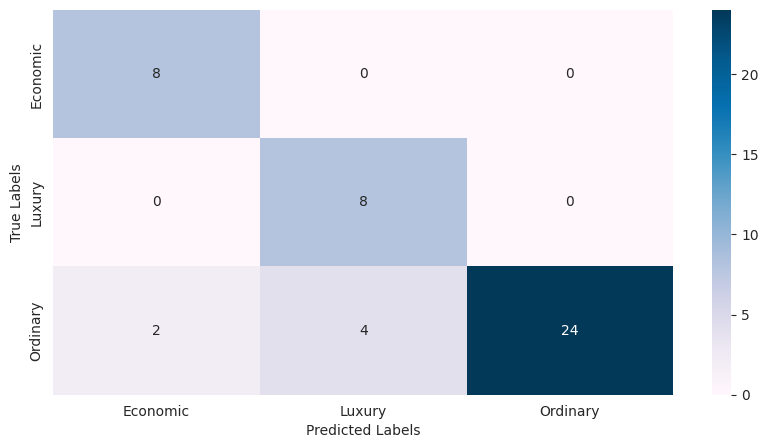


Classification Report:
              precision    recall  f1-score   support

    Economic       0.80      1.00      0.89         8
      Luxury       0.67      1.00      0.80         8
    Ordinary       1.00      0.80      0.89        30

    accuracy                           0.87        46
   macro avg       0.82      0.93      0.86        46
weighted avg       0.91      0.87      0.87        46


Accuracy: 0.8695652173913043

Weighted Average:
Precision: 0.9072463768115943
Recall: 0.8695652173913043
F1-Score: 0.8734299516908213

Macro Average:
Precision: 0.8222222222222223
Recall: 0.9333333333333332
F1-Score: 0.8592592592592593

Micro Average:
Precision: 0.8695652173913043
Recall: 0.8695652173913043
F1-Score: 0.8695652173913043


In [104]:
# KNN
knn = KNNClassifier({'n_neighbors': [2], 'weights': ['uniform']})
knn.fit(X_train_knn, y_train_knn)
knn.evaluate(X_test_knn, y_test_knn, "PuBu")

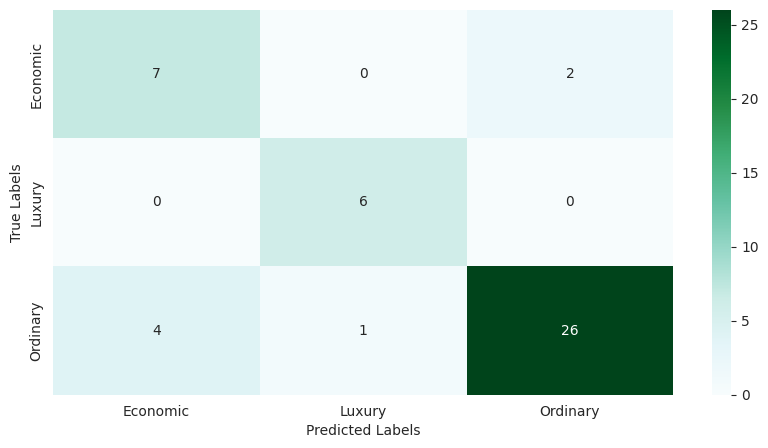


Classification Report:
              precision    recall  f1-score   support

    Economic       0.64      0.78      0.70         9
      Luxury       0.86      1.00      0.92         6
    Ordinary       0.93      0.84      0.88        31

    accuracy                           0.85        46
   macro avg       0.81      0.87      0.83        46
weighted avg       0.86      0.85      0.85        46


Accuracy: 0.8478260869565217

Weighted Average:
Precision: 0.8620835686053078
Recall: 0.8478260869565217
F1-Score: 0.8513151181905788

Macro Average:
Precision: 0.8073593073593074
Recall: 0.8721624850657109
F1-Score: 0.8348109517601042

Micro Average:
Precision: 0.8478260869565217
Recall: 0.8478260869565217
F1-Score: 0.8478260869565218


In [105]:
# Decision Tree

dt = DTClassifier({'criterion': ['entropy'], 'max_depth': [2]})
dt.fit(X_train_ds, y_train_ds)
dt.evaluate(X_test_ds, y_test_ds, "BuGn")

#### Question 27 : Optimizing The Parameters With GridSearchCV

GridSearchCV is a function provided by the scikit-learn library in Python, used for hyperparameter tuning and model selection. It performs an exhaustive search over a specified parameter grid to find the best combination of hyperparameters for a given machine learning model. We specify a parameter grid, which is a dictionary where keys are the hyperparameters we want to tune, and values are lists of values to try for each hyperparameter. Then it performs k-fold cross-validation on the training data for each combination of hyperparameters. It splits the training data into k subsets (folds), trains the model on k-1 subsets, and evaluates it on the remaining subset. This process is repeated k times, with each fold serving as the test set once. After cross-validation, GridSearchCV computes the average performance metric (e.g., accuracy, F1 score) across all folds for each parameter combination. Finally, it selects the model with the highest average performance metric and retrains it on the entire training dataset using the optimal hyperparameters.

Best Hyperparameters: {'n_neighbors': 14, 'weights': 'distance'}


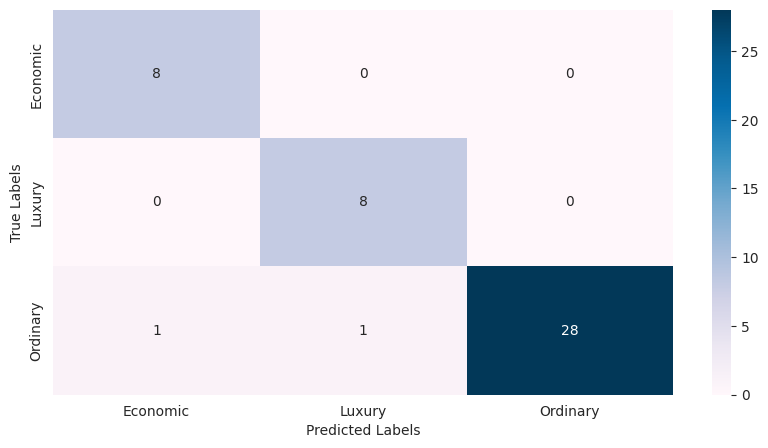


Classification Report:
              precision    recall  f1-score   support

    Economic       0.89      1.00      0.94         8
      Luxury       0.89      1.00      0.94         8
    Ordinary       1.00      0.93      0.97        30

    accuracy                           0.96        46
   macro avg       0.93      0.98      0.95        46
weighted avg       0.96      0.96      0.96        46


Accuracy: 0.9565217391304348

Weighted Average:
Precision: 0.9613526570048309
Recall: 0.9565217391304348
F1-Score: 0.9570508863215451

Macro Average:
Precision: 0.9259259259259259
Recall: 0.9777777777777779
F1-Score: 0.949290060851927

Micro Average:
Precision: 0.9565217391304348
Recall: 0.9565217391304348
F1-Score: 0.9565217391304348


In [106]:
# GridSearchCV KNN

param_grid = {'n_neighbors': np.arange(1,31,1), 'weights': ['uniform', 'distance']}
knn = KNNClassifier(param_grid=param_grid)
params = knn.fit(X_train_knn, y_train_knn)
print("Best Hyperparameters:",params)
knn.evaluate(X_test_knn, y_test_knn, "PuBu")

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20}


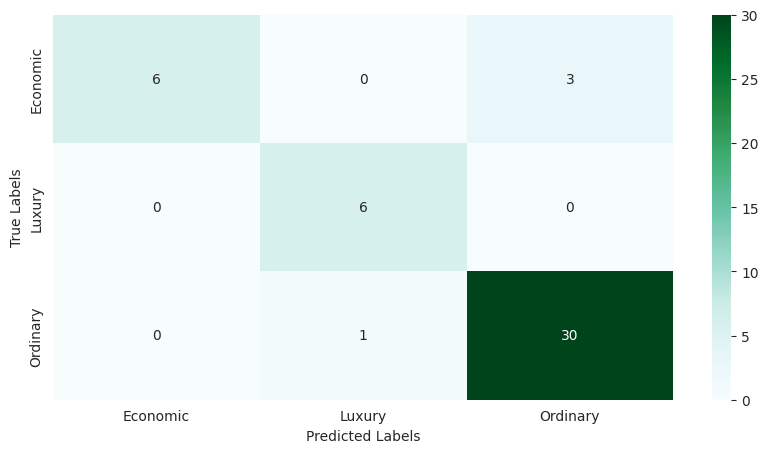


Classification Report:
              precision    recall  f1-score   support

    Economic       1.00      0.67      0.80         9
      Luxury       0.86      1.00      0.92         6
    Ordinary       0.91      0.97      0.94        31

    accuracy                           0.91        46
   macro avg       0.92      0.88      0.89        46
weighted avg       0.92      0.91      0.91        46


Accuracy: 0.9130434782608695

Weighted Average:
Precision: 0.9201016374929418
Recall: 0.9130434782608695
F1-Score: 0.9087165551839465

Macro Average:
Precision: 0.9220779220779222
Recall: 0.8781362007168458
F1-Score: 0.8868589743589744

Micro Average:
Precision: 0.9130434782608695
Recall: 0.9130434782608695
F1-Score: 0.9130434782608695


In [107]:
# Decision Tree GridSearchCV

param_grid = {'criterion': ['entropy'], 'max_depth': np.arange(20,60,1)}
dt = DTClassifier(param_grid=param_grid)
params = dt.fit(X_train_ds, y_train_ds)
print("Best Hyperparameters:",params)
dt.evaluate(X_test_ds, y_test_ds, "BuGn")

#### Question 28 : Plotting The Final Tree

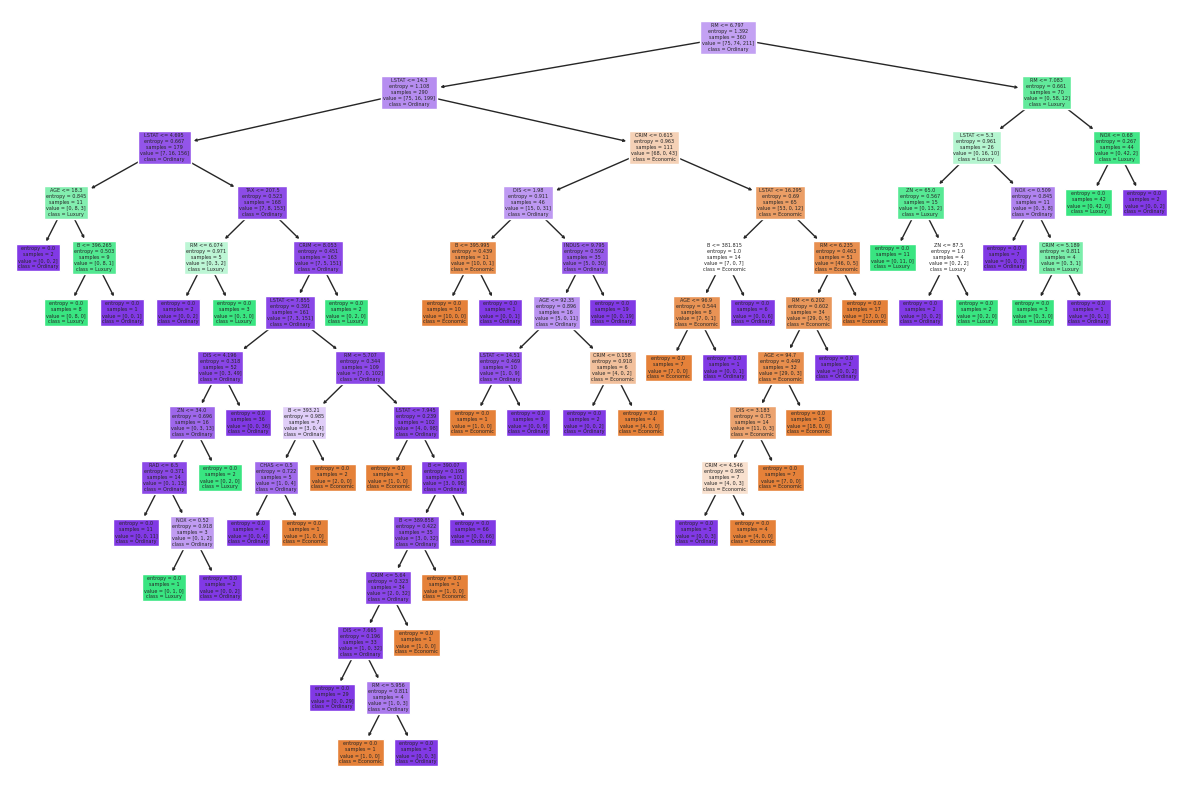

In [108]:
plt.figure(figsize=(15, 10))
plot_tree(dt.get_model(), feature_names=X_train_ds.columns, class_names=dt.get_model().classes_, filled=True)
plt.show()

#### Question 28 : Evaluating Overfitting And Underfitting

**Overfitting** occurs when a model learns the training data too well, capturing noise and random fluctuations rather than the underlying patterns. As a result, the model performs well on the training data but poorly on unseen data.

**Underfitting** occurs when a model is too simple to capture the underlying structure of the data. It fails to learn the patterns in the training data and performs poorly on both training and unseen data.

##### Evaluating Overfitting:

1. **Training and Validation Curves**: Plot the model's performance (e.g., accuracy, loss) on both the training and validation datasets as a function of model complexity (e.g., hyperparameters like tree depth, regularization strength). Overfitting is indicated by a large gap between training and validation performance, with the training performance significantly higher.

2. **Cross-Validation**: Perform k-fold cross-validation and compute the average performance metric (e.g., accuracy, F1 score) on the validation folds. If the model performs significantly better on the training folds compared to the validation folds, it may be overfitting.

##### Evaluating Underfitting:

1. **Training and Validation Curves**: Similarly to evaluating overfitting, plot the model's performance on both the training and validation datasets as a function of model complexity. Underfitting is indicated by poor performance on both training and validation datasets, with no significant improvement as model complexity increases.

2. **Model Complexity**: If you suspect underfitting, try increasing the complexity of the model by adding more layers (for neural networks), increasing the tree depth (for decision trees), or adjusting other relevant hyperparameters.

As we can see from the scores, the predictions for test data are very good and have high scores and hence, there is no underfitting. For evaluating overfitting, I have used the first method that is plotting the curves for validation and train set. As we can see below, the two plots are close and hence, there is no overfitting!

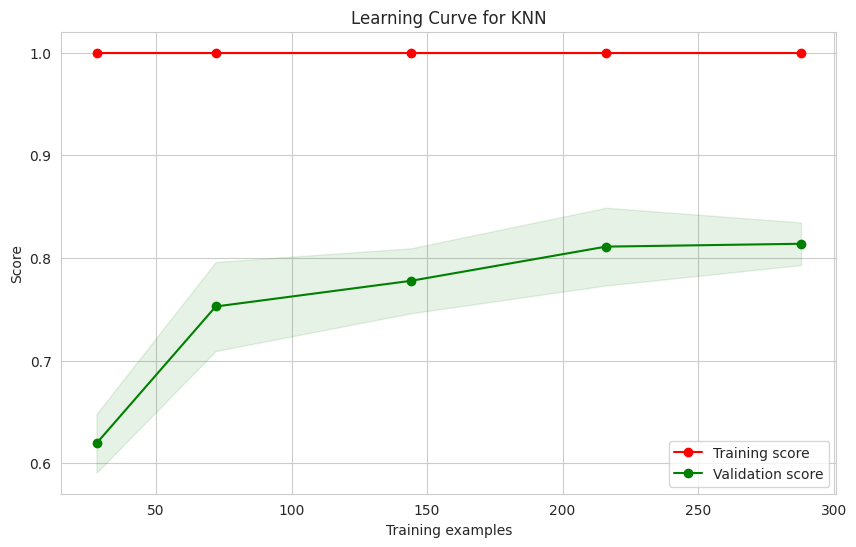

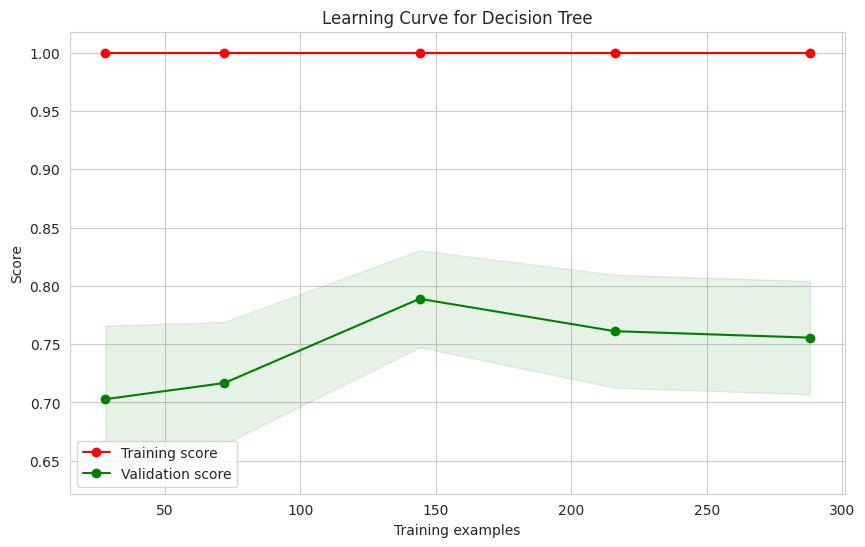

In [109]:
def plot_learning_curve(estimator, X_train, y_train, class_name):
    train_sizes, train_scores, valid_scores = learning_curve(
        estimator, X_train, y_train, train_sizes=[0.1, 0.25, 0.5, 0.75, 1], cv=5, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
             label="Validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title(f"Learning Curve for {class_name}")
    plt.show()

plot_learning_curve(knn.get_model(), X_train_knn, y_train_knn, "KNN")
plot_learning_curve(dt.get_model(), X_train_ds, y_train_ds, "Decision Tree")


### PHASE4 : Ensemble

#### Question 30 : Why Using Ensemble Methods and Why Are They So Important Today

##### Why use ensemble methods:

1. **Improved Accuracy**: Ensemble methods combine multiple models, often weaker models, to create a stronger and more robust model. By aggregating predictions from multiple models, ensemble methods can often achieve higher accuracy than individual models.

2. **Reduced Overfitting**: Ensemble methods can help reduce overfitting by averaging out the errors of individual models. This is particularly beneficial when training complex models prone to overfitting on small datasets.

3. **Enhanced Stability**: Ensemble methods are more stable and less sensitive to changes in the training data compared to individual models. This stability makes them suitable for a wide range of datasets and helps generalize well to unseen data.

4. **Versatility**: Ensemble methods can be applied to various machine learning tasks, including classification, regression, and clustering. They can also be used with different types of base learners, such as decision trees, neural networks, and support vector machines.

##### Why ensemble methods are important today:

1. **Big Data**: With the increasing availability of large datasets, ensemble methods have become essential for handling complex data and extracting meaningful insights. Ensemble methods can effectively harness the power of big data by leveraging multiple models to capture intricate patterns and relationships in the data.

2. **Model Complexity**: As machine learning models become more complex, ensuring their accuracy and generalization becomes challenging. Ensemble methods offer a practical solution by combining simpler models into a more powerful ensemble, balancing model complexity with performance.

3. **Real-world Applications**: Ensemble methods have demonstrated remarkable success in various real-world applications, including healthcare, finance, and computer vision. Their ability to deliver high accuracy and robustness makes them indispensable tools for solving complex problems in diverse domains.

#### Question 31 : Bagging and Boosting

##### Bagging (Bootstrap Aggregating):

Bagging is an ensemble learning technique that aims to improve the accuracy and stability of machine learning models by aggregating predictions from multiple models trained on different subsets of the training data. Here's how it works:

1. **Bootstrap Sampling**: Bagging involves randomly sampling subsets of the training data with replacement (bootstrap sampling). Each subset, called a bootstrap sample, has the same size as the original dataset but may contain duplicate instances.

2. **Model Training**: A base learning algorithm (e.g., decision trees) is trained on each bootstrap sample independently. This results in multiple base models, each trained on a different subset of the data.

3. **Aggregation**: The predictions of all base models are aggregated to make the final prediction. For classification tasks, the most common aggregation method is voting, where the class predicted by the majority of base models is selected as the final prediction.

Bagging helps reduce variance and prevent overfitting by averaging out the errors of individual models. It is particularly effective when the base models are unstable or prone to overfitting.

##### Boosting:

Boosting is another ensemble learning technique that combines multiple weak learners (base models) to create a strong learner. Unlike bagging, boosting focuses on sequentially training base models, where each subsequent model corrects the errors of its predecessors. Here's how it works:

1. **Sequential Training**: Boosting involves iteratively training a sequence of weak learners. In each iteration, the training data is re-weighted, with more emphasis placed on instances that were misclassified by previous models.

2. **Weighted Aggregation**: Each base model is assigned a weight based on its performance on the training data. Models that perform well are given higher weights, while models that perform poorly are given lower weights.

3. **Final Prediction**: The final prediction is made by combining the predictions of all base models, weighted by their respective weights. Typically, a weighted sum or a weighted voting scheme is used for aggregation.

Boosting focuses on reducing bias and improving the accuracy of the ensemble by sequentially training models that are better at capturing difficult-to-classify instances.

##### Differences between Bagging and Boosting:

1. **Sequential vs. Parallel Training**: Bagging trains base models independently in parallel, while boosting trains them sequentially, with each subsequent model focusing on correcting the errors of its predecessors.

2. **Weighted vs. Equal Voting**: Bagging uses equal voting (or averaging) of base models' predictions, whereas boosting assigns weights to base models based on their performance and uses weighted voting for aggregation.

3. **Variance vs. Bias Reduction**: Bagging primarily reduces variance by averaging out the errors of individual models, while boosting focuses on reducing bias by sequentially training models to correct errors.

4. **Base Model Selection**: Bagging typically uses the same base learning algorithm for all models, while boosting can use a variety of weak learners and adaptively select them based on their performance.

#### Question 32 : Random Forest Explanation

Random Forest is a powerful ensemble learning technique used for classification and regression tasks. It builds multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Here's an explanation of how the Random Forest algorithm works:

##### Random Forest Algorithm:

1. **Bootstrap Sampling**: Random Forest starts by randomly selecting a subset of the training data with replacement. This process is known as bootstrap sampling. Each subset is used to train a decision tree.

2. **Random Feature Selection**: At each node of the decision tree, instead of considering all features to determine the best split, Random Forest randomly selects a subset of features. This introduces randomness into the trees and helps decorrelate them, making the ensemble more robust and reducing overfitting.

3. **Decision Tree Training**: Using the bootstrap samples and randomly selected features, Random Forest trains multiple decision trees independently. Each decision tree is trained until it reaches a predefined maximum depth or no further splits are possible based on the selected features.

4. **Voting (Classification) or Averaging (Regression)**: Once all decision trees are trained, Random Forest aggregates their predictions. For classification tasks, the mode (most frequent class) of the predictions from all trees is taken as the final prediction. For regression tasks, the mean prediction of all trees is calculated.

5. **Ensemble Prediction**: The final prediction of the Random Forest is based on the aggregated predictions of all decision trees. This ensemble approach often leads to more robust and accurate predictions compared to individual decision trees.

#### Question 33 : Bootstrapping

Bootstrapping in Random Forest is a crucial component of the algorithm that involves sampling with replacement from the original dataset to create multiple subsets for training individual decision trees. Here's an explanation of bootstrapping in Random Forest and its impact on the results of predictions:

1. **Sampling with Replacement**: Bootstrapping involves randomly selecting samples from the original dataset with replacement. This means that each sample in the dataset has an equal chance of being selected for a subset multiple times or not at all.

2. **Subset Creation**: Each bootstrap sample serves as a training set for building a decision tree in the Random Forest ensemble. The size of the bootstrap sample is typically the same as the size of the original dataset, but since sampling is done with replacement, each bootstrap sample may contain duplicate instances and exclude some original instances.

3. **Independence between Trees**: By creating multiple subsets through bootstrapping, Random Forest ensures that each decision tree in the ensemble is trained on a slightly different subset of the data. This introduces diversity among the trees and helps reduce correlation between them, making the ensemble more robust and less prone to overfitting.

##### Impact on Prediction Results:

1. **Reduced Variance**: Bootstrapping helps reduce the variance of individual decision trees by training them on different subsets of the data. This leads to a more stable ensemble model that generalizes well to unseen data.

2. **Improved Accuracy**: By averaging the predictions of multiple decision trees trained on different bootstrap samples, Random Forest can achieve higher accuracy compared to a single decision tree. The diversity among the trees helps capture different aspects of the data, leading to more reliable predictions.

3. **Feature Importance Estimation**: Bootstrapping also plays a role in estimating feature importance in Random Forest. Features that are consistently selected in the bootstrap samples and lead to significant improvements in predictive performance across the ensemble are considered more important.

#### Question 34 : Number of Decision Trees in Random Forests

The number of decision trees in a Random Forest does influence the performance of the model. Increasing the number of trees generally improves the performance of the Random Forest up to a certain point, beyond which the performance may plateau or even decrease due to overfitting. The optimal number of trees depends on factors such as the complexity of the dataset, the quality of the features, and the computational resources available.

Empirically, there is no fixed "best" value for the number of trees in a Random Forest, as it varies depending on the specific problem and dataset. However, a common approach is to perform a grid search or cross-validation to tune the hyperparameters of the Random Forest, including the number of trees, and select the value that results in the best performance metric (e.g., accuracy, F1 score, or mean squared error).

In practice, starting with a relatively large number of trees (e.g., 100 or more) and then tuning it using cross-validation can help identify the optimal number of trees for the given dataset. It's important to strike a balance between model complexity and computational resources, as using too many trees can lead to longer training times and increased memory usage without necessarily improving performance significantly.

Additionally, ensemble methods like Random Forest are known for their robustness to the number of trees, meaning that even if the optimal number is not chosen, the model may still perform reasonably well with a wide range of values.

#### Question 35 : When to Use Random Forests and When Not

##### When Random Forests are Appropriate:

1. **High-Dimensional Data**: Random Forests are effective for datasets with a large number of features or high dimensionality. They can handle complex relationships between features and target variables without overfitting, making them suitable for tasks with many input variables.

2. **Nonlinear Relationships**: Random Forests can capture nonlinear relationships between features and target variables. They are robust to noisy data and can handle interactions and non-linearities effectively, making them suitable for tasks where the underlying relationships are complex.

3. **Large Datasets**: Random Forests are scalable and can handle large datasets efficiently. They can be parallelized and distributed across multiple processors or machines, making them suitable for big data applications.

4. **Mixed Data Types**: Random Forests can handle both numerical and categorical features without requiring extensive preprocessing. They can accommodate missing values and outliers and are less sensitive to data distribution compared to some other algorithms.

5. **Ensemble Learning**: Random Forests are part of the ensemble learning family, which combines multiple models to improve predictive performance. They are particularly effective when used in conjunction with other ensemble methods or as a component of more complex models.

##### When Random Forests are Not Appropriate:

1. **Interpretability**: Random Forests are often considered black-box models, meaning that they provide accurate predictions but offer limited interpretability compared to simpler models like decision trees or linear regression. If interpretability is a priority, simpler models may be more suitable.

2. **Training Time**: While Random Forests are efficient for most tasks, they can be computationally expensive to train, especially with large datasets or a large number of trees. If training time is a concern, simpler models or model selection techniques may be preferred.

3. **Imbalanced Data**: Random Forests may struggle with imbalanced datasets where one class is significantly more prevalent than others. While techniques such as class weighting or resampling can help address this issue, other algorithms specifically designed for imbalanced data may be more suitable.

4. **Online Learning**: Random Forests are typically trained using batch learning, where the entire dataset is used to train the model at once. They may not be suitable for online learning scenarios where the data arrives sequentially, and the model needs to be updated continuously.

5. **Linear Relationships**: Random Forests are not well-suited for tasks where the relationship between features and target variables is primarily linear. In such cases, linear models like linear regression may be more appropriate.

#### Question 36 : The Impact on Variance Using Random Forest

When using Random Forests, the impact on variance is typically reduced compared to using a single decision tree. This reduction in variance is one of the key advantages of Random Forests and is achieved through the ensemble learning approach. Here's how Random Forests affect variance:

1. **Ensemble of Trees**: Random Forests consist of multiple decision trees trained on different subsets of the data (bootstrapped samples) and with random subsets of features considered at each split. By aggregating the predictions of multiple trees, Random Forests reduce the variance inherent in individual decision trees.

2. **Decorrelation of Trees**: Each decision tree in a Random Forest is trained independently, leading to diversity among the trees. Since the trees are trained on different subsets of the data and with different subsets of features, they are less likely to make the same errors. As a result, the predictions of the ensemble tend to be more stable and less sensitive to fluctuations in the training data.

3. **Voting or Averaging**: In the case of classification tasks, Random Forests aggregate the predictions of individual trees through majority voting. For regression tasks, they aggregate predictions through averaging. This ensemble approach helps smooth out the predictions and reduce the impact of outliers or noise in the data, leading to a more robust model with lower variance.


#### Question 37 : Implementing Random Forest

##### Hyperparameters of Random Forest:

1. **n_estimators**: The number of decision trees in the forest. Increasing the number of trees generally improves the performance of the model, but it also increases the computational cost.

2. **max_depth**: The maximum depth of each decision tree in the forest. It controls the depth of the trees and helps prevent overfitting. 

3. **min_samples_split**: The minimum number of samples required to split an internal node. Increasing this value can prevent the trees from splitting too early, which can also help prevent overfitting.

4. **min_samples_leaf**: The minimum number of samples required to be at a leaf node. This parameter can help control the size of the trees and prevent overfitting.

5. **max_features**: The number of features to consider when looking for the best split. By default, it's set to "auto", which considers the square root of the total number of features. You can also specify a fraction or an integer number of features to consider.

In [110]:
class RFClassifier:
    def __init__(self, param_grid=None, cv=5):
        self.param_grid = param_grid
        self.cv = cv
        self.model = None
    
    def fit(self, X_train, y_train):
        rf = RandomForestClassifier()
        grid_search = GridSearchCV(estimator=rf, param_grid=self.param_grid, cv=self.cv, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        self.model = grid_search.best_estimator_
        return grid_search.best_params_
    
    def predict(self, X_test):
        return self.model.predict(X_test)
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        labels_ds = ['Economic', 'Luxury', 'Ordinary']
        calc_scores(labels_ds, y_test, y_pred, 'BuGn')


Best Hyperparameters: {'max_depth': 21, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 120}


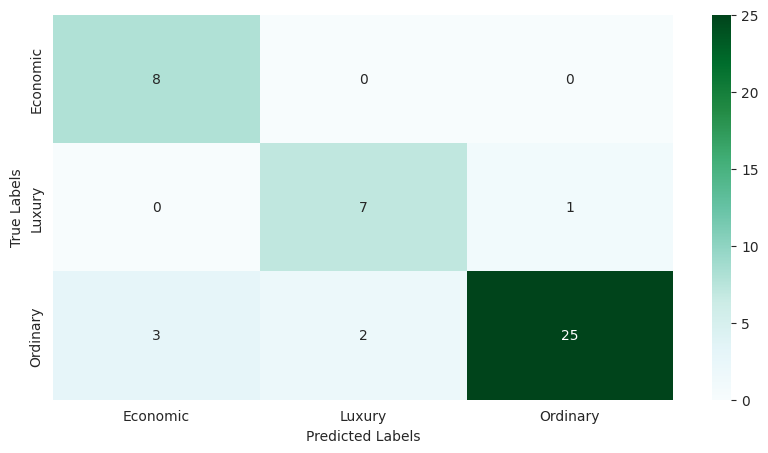


Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       0.78      0.88      0.82         8
           2       0.96      0.83      0.89        30

    accuracy                           0.87        46
   macro avg       0.82      0.90      0.85        46
weighted avg       0.89      0.87      0.87        46


Accuracy: 0.8695652173913043

Weighted Average:
Precision: 0.8888382149251715
Recall: 0.8695652173913043
F1-Score: 0.871973732284676

Macro Average:
Precision: 0.8221963221963223
Recall: 0.9027777777777778
F1-Score: 0.8528306059265812

Micro Average:
Precision: 0.8695652173913043
Recall: 0.8695652173913043
F1-Score: 0.8695652173913043


In [122]:
param_grid = {
    'n_estimators': np.arange(80,200,40),
    'max_depth': np.arange(15,25,3),
    'min_samples_split': np.arange(2,10,2),
    'min_samples_leaf': np.arange(1,10,2),
    'max_features': ['log2', 'sqrt']
}

rf_classifier = RFClassifier(param_grid,7)
best_params = rf_classifier.fit(X_train_xg, y_train_xg.values.astype(np.int64))
print("Best Hyperparameters:", best_params)
rf_classifier.evaluate(X_test_xg, y_test_xg.values.astype(np.int64))

### ‌‌BONUS PART : XGBoost

#### Question 38 : XGBoost Explanation

XGBoost (Extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm, designed for speed and performance. It is widely used for supervised learning tasks, including classification, regression, and ranking problems. XGBoost has gained popularity in machine learning competitions and real-world applications due to its efficiency, scalability, and effectiveness.

##### Key Components of XGBoost:

1. **Gradient Boosting**: XGBoost belongs to the family of ensemble learning methods known as gradient boosting. It works by sequentially adding new models (typically decision trees) to correct the errors made by the existing models. Each new model is trained to predict the residuals (the differences between the actual and predicted values) of the ensemble.

2. **Tree-based Models**: The base learners in XGBoost are decision trees. By default, XGBoost uses a "CART" algorithm to create decision trees, which stands for Classification And Regression Trees. Each decision tree is built sequentially, and at each step, it tries to maximize a specific objective function.

3. **Regularization**: XGBoost incorporates regularization techniques to prevent overfitting and improve generalization performance. It includes both L1 (Lasso) and L2 (Ridge) regularization terms in the objective function, controlling the complexity of the learned models.

4. **Gradient Boosting Algorithm**: XGBoost optimizes the objective function using a gradient descent algorithm. It computes the gradient of the loss function with respect to the model predictions and updates the model parameters in the direction that minimizes the loss.

5. **Feature Importance**: XGBoost provides insights into feature importance, allowing users to understand which features are most influential in making predictions. Feature importance scores are calculated based on how frequently features are used in the construction of decision trees and how much they reduce the loss function.

6. **Parallel and Distributed Computing**: XGBoost is optimized for speed and scalability. It supports parallel and distributed computing, allowing it to leverage multiple CPU cores and distributed computing frameworks (such as Dask and Spark) to train large-scale datasets efficiently.

##### Advantages of XGBoost:

- **High Performance**: XGBoost is known for its speed and efficiency, making it suitable for large datasets and time-sensitive applications.
  
- **Robustness**: XGBoost handles missing values, outliers, and noisy data effectively. It also incorporates regularization techniques to prevent overfitting.
  
- **Flexibility**: XGBoost supports a wide range of objective functions, evaluation metrics, and hyperparameters, giving users flexibility in model customization and optimization.

- **Interpretability**: XGBoost provides insights into feature importance, enabling users to interpret and understand the model's predictions.

- **State-of-the-Art Results**: XGBoost has been widely adopted in both academia and industry and has achieved state-of-the-art results in various machine learning competitions and real-world applications.

##### Limitations of XGBoost:

- **Parameter Tuning**: XGBoost requires careful tuning of hyperparameters to achieve optimal performance. While it provides default parameter settings, fine-tuning is often necessary to achieve the best results.

- **Memory Usage**: XGBoost may consume significant memory, especially when training large models or on large datasets. Users should be mindful of memory constraints when working with XGBoost.

- **Black Box Model**: Like other ensemble methods, XGBoost can be considered a black box model, making it challenging to interpret the learned relationships between features and target variables.

#### Question 38 : Gradient Boosting Explaination and Difference Between Boosting Tree and Decision Tree

Gradient boosting is a machine learning technique used for supervised learning tasks, particularly for regression and classification problems. It builds a predictive model in the form of an ensemble of weak learners, typically decision trees, in a sequential manner.

##### Key Components of Gradient Boosting:

1. **Weak Learners**: Gradient boosting employs a sequence of weak learners, often decision trees, as the base models. These weak learners are relatively simple models that perform slightly better than random guessing. In the context of decision trees, each weak learner is typically a shallow tree with only a few levels.

2. **Residual Fitting**: Gradient boosting works by sequentially fitting weak learners to the residuals (errors) of the previous model in the ensemble. Each new model focuses on learning the residuals or errors made by the existing ensemble, gradually reducing the overall error of the model.

3. **Gradient Descent**: The term "gradient" in gradient boosting refers to the optimization technique used to minimize the loss function. In each iteration, gradient descent is applied to update the parameters of the weak learner in the direction that minimizes the loss function, effectively reducing the error of the ensemble.

4. **Ensemble Learning**: Gradient boosting combines multiple weak learners into a strong predictive model by adding them sequentially. Each weak learner contributes to the overall prediction, and the final prediction is the weighted sum of the predictions made by all weak learners.

##### Difference Between Boosting Tree and Decision Tree:

1. **Boosting Tree**: Boosting tree refers to the ensemble learning technique of boosting, where multiple weak learners (trees) are combined sequentially to form a strong predictive model. In boosting tree algorithms such as AdaBoost, Gradient Boosting, and XGBoost, each weak learner is typically a decision tree trained on the residuals of the previous model in the ensemble.

2. **Decision Tree**: A decision tree is a simple, non-parametric supervised learning algorithm used for both classification and regression tasks. It predicts the target variable by learning simple decision rules inferred from the features of the data. Unlike boosting tree algorithms, a single decision tree is not an ensemble method and does not involve combining multiple trees sequentially.

#### Question 39 : XGBoost Implementation and Hyperparameters

1. **learning_rate**: The learning rate determines the step size at each iteration while moving towards a minimum of the loss function. A lower learning rate makes the model more robust to overfitting but requires more iterations to converge.

2. **n_estimators**: The number of boosting rounds or the number of trees to fit. A higher number of trees can lead to better performance but can also increase the risk of overfitting and computational cost.

3. **max_depth**: The maximum depth of a tree. Deeper trees can capture more complex patterns in the data but are more prone to overfitting.

4. **min_child_weight**: Minimum sum of instance weight (hessian) needed in a child. It helps prevent overfitting by controlling the minimum number of samples (or instances) required in each leaf node.

5. **subsample**: The fraction of samples to be used for fitting the individual base learners. Setting it to a value less than 1.0 can help prevent overfitting.

6. **colsample_bytree**: The fraction of features to be randomly sampled for each tree. It can be used to control the complexity of individual trees and prevent overfitting.

7. **gamma**: Minimum loss reduction required to make a further partition on a leaf node of the tree. It acts as regularization and controls the complexity of the tree.

8. **reg_alpha**: L1 regularization term on weights. It adds a penalty term to the loss function based on the absolute value of the weights, promoting sparsity in the feature space.

9. **reg_lambda**: L2 regularization term on weights. It adds a penalty term to the loss function based on the square of the weights, controlling the smoothness of the model.

10. **objective**: The loss function to be optimized. It can be set to different values depending on the task (e.g., binary classification, multiclass classification, regression).

In [112]:
class XGBoost:
    def __init__(self, param_grid=None, cv=2):
        self.param_grid = param_grid
        self.cv = cv
        self.model = None
    
    def fit(self, X_train, y_train):
        xgb = XGBClassifier()
        grid_search = GridSearchCV(estimator=xgb, param_grid=self.param_grid, cv=self.cv, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        self.model = grid_search.best_estimator_
        return grid_search.best_params_
    
    def predict(self, X_test):
        return self.model.predict(X_test)
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        labels_ds = ['Economic', 'Luxury', 'Ordinary']
        calc_scores(labels_ds, y_test, y_pred, 'BuGn')
    

Best Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 170}


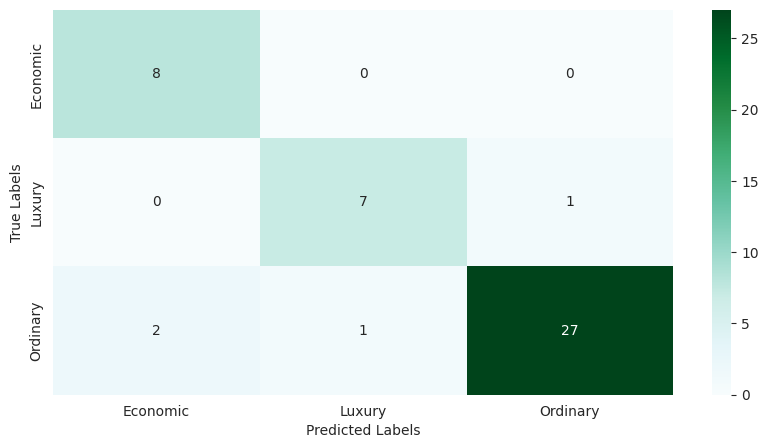


Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.88      0.88      0.88         8
           2       0.96      0.90      0.93        30

    accuracy                           0.91        46
   macro avg       0.88      0.92      0.90        46
weighted avg       0.92      0.91      0.91        46


Accuracy: 0.9130434782608695

Weighted Average:
Precision: 0.9201863354037267
Recall: 0.9130434782608695
F1-Score: 0.9139596868232551

Macro Average:
Precision: 0.8797619047619047
Recall: 0.9249999999999999
F1-Score: 0.8983077905491698

Micro Average:
Precision: 0.9130434782608695
Recall: 0.9130434782608695
F1-Score: 0.9130434782608695


In [113]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators' : [170,180,190,200,210],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb = XGBoost(param_grid, 6)
best_params = xgb.fit(X_train_xg, y_train_xg.values.astype(np.int64))
print("Best Hyperparameters:", best_params)
xgb.evaluate(X_test_xg, y_test_xg.values.astype(np.int64))

### PHASE5 : Support Vector Machine

#### Question 40 : SVM Questions

##### 1. Explain the result of running the model by evaluating the scores.

As we can see, the scores for RBF kernel is better than Linear kernel and this implies that our dataset is highly probable that is not linearly separable.

In [114]:
class SVMClassifier:
    def __init__(self, kernel):
        self.kernel = kernel
    
    def _get_param_grid(self):
        param_grid = {
            'C': np.arange(1,20,1),
            'gamma': np.arange(0.1,5,0.1),
        }
        return param_grid
    
    def _get_param_dist(self):
        param_dist = {
            'C': np.logspace(start=-3, stop=3, num=100),
            'gamma': np.logspace(start=-3, stop=3, num=100),
        }
        return param_dist
    
    def _get_classifier(self):
        return SVC(kernel=self.kernel, random_state=42)
    
    def grid_search(self, X_train, y_train):
        param_grid = self._get_param_grid()
        svm_classifier = self._get_classifier()
        grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=10, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        return grid_search.best_params_
    
    def random_search(self, X_train, y_train):
        param_dist = self._get_param_dist()
        svm_classifier = self._get_classifier()
        random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist, cv=10, n_iter=50, random_state=42, n_jobs=-1)
        random_search.fit(X_train, y_train)
        return random_search.best_params_
    
    def score(self, X_train, y_train, X_test, y_test, color, best_params={'C': 1, 'gamma': 0.1}):
        svm_classifier = self._get_classifier()
        svm_classifier.set_params(**best_params)
        svm_classifier.fit(X_train, y_train)
        y_pred = svm_classifier.predict(X_test)
        calc_scores(labels_ds, y_test, y_pred, color)

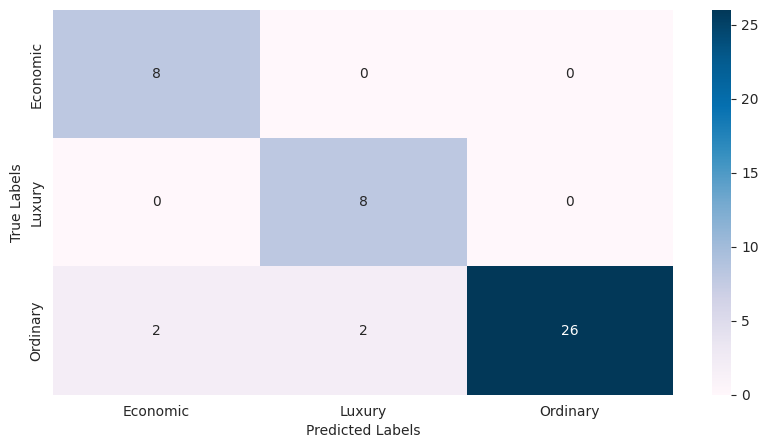


Classification Report:
              precision    recall  f1-score   support

    Economic       0.80      1.00      0.89         8
      Luxury       0.80      1.00      0.89         8
    Ordinary       1.00      0.87      0.93        30

    accuracy                           0.91        46
   macro avg       0.87      0.96      0.90        46
weighted avg       0.93      0.91      0.91        46


Accuracy: 0.9130434782608695

Weighted Average:
Precision: 0.9304347826086956
Recall: 0.9130434782608695
F1-Score: 0.9147688060731539

Macro Average:
Precision: 0.8666666666666667
Recall: 0.9555555555555556
F1-Score: 0.9021164021164022

Micro Average:
Precision: 0.9130434782608695
Recall: 0.9130434782608695
F1-Score: 0.9130434782608695


In [115]:
# SVM RBF using default parameters

svm_rbf = SVMClassifier(kernel="rbf")
svm_rbf.score(X_train_knn, y_train_knn, X_test_knn, y_test_knn, 'PuBu')

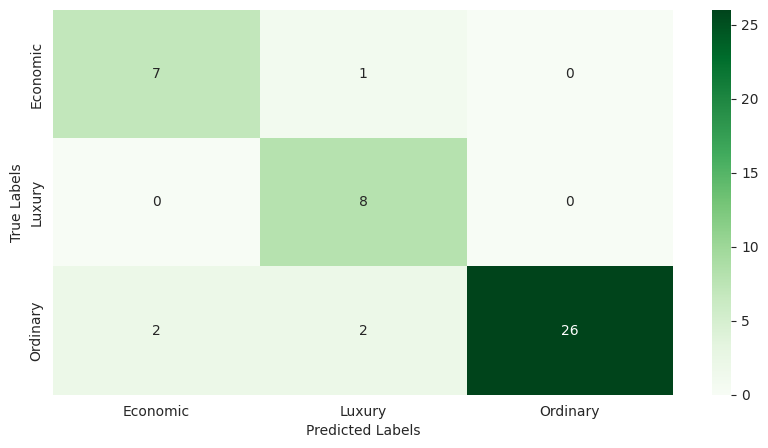


Classification Report:
              precision    recall  f1-score   support

    Economic       0.78      0.88      0.82         8
      Luxury       0.73      1.00      0.84         8
    Ordinary       1.00      0.87      0.93        30

    accuracy                           0.89        46
   macro avg       0.84      0.91      0.86        46
weighted avg       0.91      0.89      0.90        46


Accuracy: 0.8913043478260869

Weighted Average:
Precision: 0.9139218269653052
Recall: 0.8913043478260869
F1-Score: 0.8952656577505145

Macro Average:
Precision: 0.8350168350168351
Recall: 0.9138888888888889
F1-Score: 0.8647353678313431

Micro Average:
Precision: 0.8913043478260869
Recall: 0.8913043478260869
F1-Score: 0.8913043478260869


In [116]:
# SVM Linear using default parameters

svm_rbf = SVMClassifier(kernel="linear")
svm_rbf.score(X_train_knn, y_train_knn, X_test_knn, y_test_knn, 'Greens')

##### 2. Is it better to use grid search or random search here and why?

##### Grid Search:

- **Exhaustive Search**: Grid Search evaluates all possible combinations of hyperparameters specified in the grid. It exhaustively searches through the entire parameter space, making it suitable for relatively small search spaces or when you have a good understanding of which hyperparameters are important.
  
- **Comprehensive Coverage**: Grid Search ensures that all combinations of hyperparameters are explored, providing a comprehensive view of the search space. It guarantees that the best hyperparameters within the specified grid will be found, given enough computational resources and time.

##### Random Search:

- **Efficiency**: Random Search randomly samples hyperparameter combinations from the search space. It is more efficient than Grid Search when the search space is large or when only a few hyperparameters significantly affect model performance. Random Search can quickly identify promising regions of the search space without exhaustively evaluating all combinations.
  
- **Scalability**: Random Search is more scalable than Grid Search as it does not require evaluating all possible combinations. It can efficiently explore a large search space with a limited number of iterations.

Here, because the hyperparameters for svm models are low and also the search space is not very big, it is better to use grid search.

#### SVM GridSearch (RBF and Linear Kernels)

Best Hyperparameters: {'C': 4, 'gamma': 0.1}


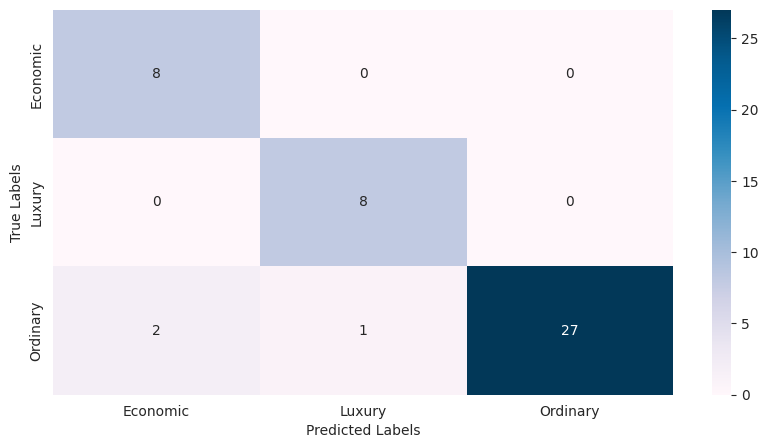


Classification Report:
              precision    recall  f1-score   support

    Economic       0.80      1.00      0.89         8
      Luxury       0.89      1.00      0.94         8
    Ordinary       1.00      0.90      0.95        30

    accuracy                           0.93        46
   macro avg       0.90      0.97      0.93        46
weighted avg       0.95      0.93      0.94        46


Accuracy: 0.9347826086956522

Weighted Average:
Precision: 0.9458937198067633
Recall: 0.9347826086956522
F1-Score: 0.9361212066825205

Macro Average:
Precision: 0.8962962962962964
Recall: 0.9666666666666667
F1-Score: 0.9258112601765852

Micro Average:
Precision: 0.9347826086956522
Recall: 0.9347826086956522
F1-Score: 0.9347826086956522


In [117]:
# SVM RBF using GridSerarch

svm_rbf = SVMClassifier(kernel="rbf")
best_params_rbf = svm_rbf.grid_search(X_train_knn, y_train_knn)
print("Best Hyperparameters:", best_params_rbf)
svm_rbf.score(X_train_knn, y_train_knn, X_test_knn, y_test_knn, 'PuBu', best_params_rbf)

Best Hyperparameters: {'C': 1, 'gamma': 0.1}


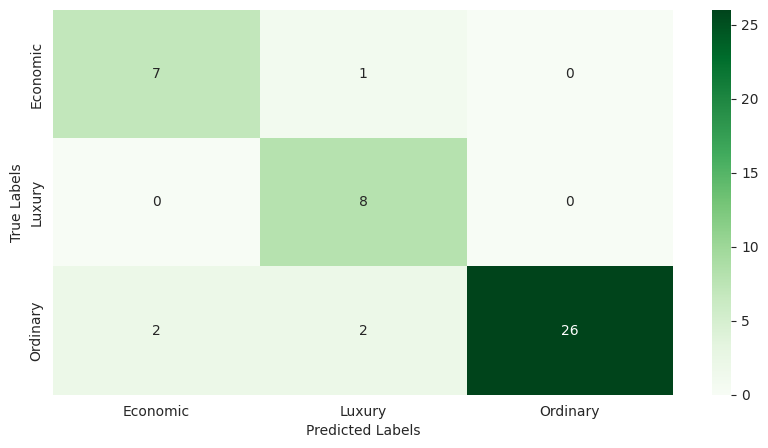


Classification Report:
              precision    recall  f1-score   support

    Economic       0.78      0.88      0.82         8
      Luxury       0.73      1.00      0.84         8
    Ordinary       1.00      0.87      0.93        30

    accuracy                           0.89        46
   macro avg       0.84      0.91      0.86        46
weighted avg       0.91      0.89      0.90        46


Accuracy: 0.8913043478260869

Weighted Average:
Precision: 0.9139218269653052
Recall: 0.8913043478260869
F1-Score: 0.8952656577505145

Macro Average:
Precision: 0.8350168350168351
Recall: 0.9138888888888889
F1-Score: 0.8647353678313431

Micro Average:
Precision: 0.8913043478260869
Recall: 0.8913043478260869
F1-Score: 0.8913043478260869


In [118]:
# SVM Linear using GridSerarch

svm_rbf = SVMClassifier(kernel="linear")
best_params_rbf = svm_rbf.grid_search(X_train_knn, y_train_knn)
print("Best Hyperparameters:", best_params_rbf)
svm_rbf.score(X_train_knn, y_train_knn, X_test_knn, y_test_knn, 'Greens', best_params_rbf)

#### SVM Random Search (RBF and Linear Kernels)

Best Hyperparameters: {'gamma': 0.006135907273413176, 'C': 35.111917342151344}


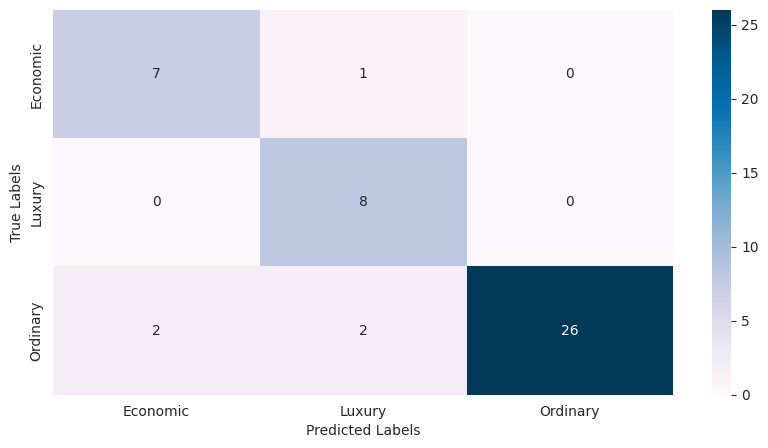


Classification Report:
              precision    recall  f1-score   support

    Economic       0.78      0.88      0.82         8
      Luxury       0.73      1.00      0.84         8
    Ordinary       1.00      0.87      0.93        30

    accuracy                           0.89        46
   macro avg       0.84      0.91      0.86        46
weighted avg       0.91      0.89      0.90        46


Accuracy: 0.8913043478260869

Weighted Average:
Precision: 0.9139218269653052
Recall: 0.8913043478260869
F1-Score: 0.8952656577505145

Macro Average:
Precision: 0.8350168350168351
Recall: 0.9138888888888889
F1-Score: 0.8647353678313431

Micro Average:
Precision: 0.8913043478260869
Recall: 0.8913043478260869
F1-Score: 0.8913043478260869


In [119]:
# SVM RBF using RandomSearch

svm_rbf = SVMClassifier(kernel="rbf")
best_params_rbf = svm_rbf.random_search(X_train_knn, y_train_knn)
print("Best Hyperparameters:", best_params_rbf)
svm_rbf.score(X_train_knn, y_train_knn, X_test_knn, y_test_knn, 'PuBu', best_params_rbf)

Best Hyperparameters: {'gamma': 1.232846739442066, 'C': 1.072267222010323}


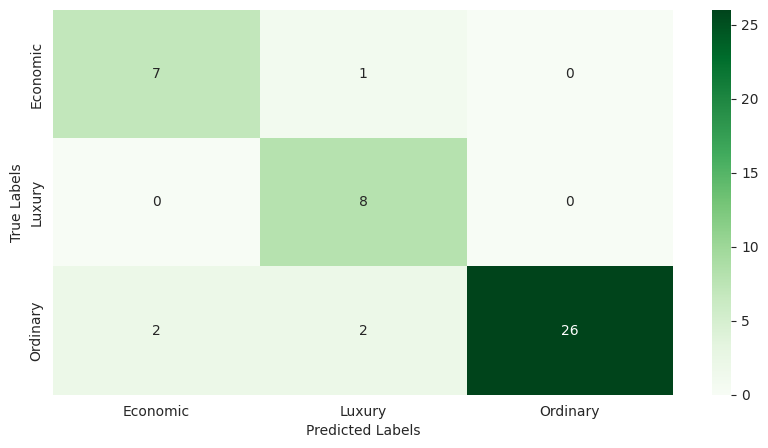


Classification Report:
              precision    recall  f1-score   support

    Economic       0.78      0.88      0.82         8
      Luxury       0.73      1.00      0.84         8
    Ordinary       1.00      0.87      0.93        30

    accuracy                           0.89        46
   macro avg       0.84      0.91      0.86        46
weighted avg       0.91      0.89      0.90        46


Accuracy: 0.8913043478260869

Weighted Average:
Precision: 0.9139218269653052
Recall: 0.8913043478260869
F1-Score: 0.8952656577505145

Macro Average:
Precision: 0.8350168350168351
Recall: 0.9138888888888889
F1-Score: 0.8647353678313431

Micro Average:
Precision: 0.8913043478260869
Recall: 0.8913043478260869
F1-Score: 0.8913043478260869


In [120]:
# SVM Linear using GridSerarch

svm_rbf = SVMClassifier(kernel="linear")
best_params_rbf = svm_rbf.random_search(X_train_knn, y_train_knn)
print("Best Hyperparameters:", best_params_rbf)
svm_rbf.score(X_train_knn, y_train_knn, X_test_knn, y_test_knn, 'Greens', best_params_rbf)

#### Resources:

https://www.geeksforgeeks.org/exploratory-data-analysis-eda-types-and-tools/

https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/

https://medium.com/@iqra.bismi/using-hexbin-plots-to-visualise-relationship-between-two-variables-42e26bce3df1

https://builtin.com/data-science/when-and-why-standardize-your-data#:~:text=Normalization%20involves%20scaling%20data%20values%20in%20a%20range%20between%20%5B0,is%20best%20for%20normal%20distributions.

https://www.simplilearn.com/normalization-vs-standardization-article

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

https://builtin.com/data-science/when-and-why-standardize-your-data

https://jpt.spe.org/data-transformation-standardization-vs-normalization?gad_source=1&gclid=CjwKCAjwouexBhAuEiwAtW_ZxwXibC_l_KmzWZWmYZd2VtuQ_bHzQ0zU733ezJ6uXZ5USHilSHG-pRoCfZsQAvD_BwE

https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html

https://www.analyticsvidhya.com/blog/2021/08/data-preprocessing-in-data-mining-a-hands-on-guide/#:~:text=Data%20preprocessing%20is%20the%20process,learning%20or%20data%20mining%20algorithms.

https://www.geeksforgeeks.org/data-preprocessing-in-data-mining/

https://www.geeksforgeeks.org/data-preprocessing-machine-learning-python/

https://serokell.io/blog/data-preprocessing-in-python

https://www.analyticsvidhya.com/blog/2021/08/data-preprocessing-in-data-mining-a-hands-on-guide/

https://www.geeksforgeeks.org/regression-in-machine-learning/

https://www.youtube.com/watch?v=TJveOYsK6MY

https://www.geeksforgeeks.org/types-of-regression-techniques/

https://www.ibm.com/topics/gradient-descent

https://aws.amazon.com/what-is/reinforcement-learning/

https://www.geeksforgeeks.org/ml-linear-regression/

https://www.geeksforgeeks.org/random-forest-regression-in-python/

https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/

https://www.geeksforgeeks.org/multivariate-regression/

https://towardsdatascience.com/negative-r2-where-did-you-go-wrong-9d4f2aa84cfb#:~:text=Receipt%20of%20a%20negative%20R2,average%20as%20a%20predicted%20value.

https://chatgpt.com

https://www.mathworks.com/help/stats/linearmodel.plot.html

https://www.youtube.com/watch?v=D0efHEJsfHo

https://www.youtube.com/watch?v=q90UDEgYqeI

https://scikit-learn.org/stable/modules/tree.html#:~:text=Decision%20Trees%20(DTs)%20are%20a,as%20a%20piecewise%20constant%20approximation.

https://www.geeksforgeeks.org/cross-validation-machine-learning/#

https://www.geeksforgeeks.org/k-nearest-neighbours/

https://www.geeksforgeeks.org/a-comprehensive-guide-to-ensemble-learning/

https://www.geeksforgeeks.org/support-vector-machine-algorithm/

https://www.youtube.com/watch?v=6QSrgmMH4hE

https://www.youtube.com/watch?v=v6VJ2RO66Ag

https://www.youtube.com/watch?v=D9A8zIiJSAo

And lots of other searches and videos!
